<a href="https://colab.research.google.com/github/anjaikr/anjaikr/blob/master/Featurization_and_Model_Tuning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto');
a {color: #37c9e1; font-family: 'Roboto';} 
h1 {color: #C20E69; font-family: 'Poppins'} 
h2, h3 {color: #25B89B; font-family: 'Poppins';}
h4 {color: #818286; font-family: 'Roboto';}
                                      
</style>

# Problem statement

**Determing of strength of high performance concrete using Machine Learning.**

# Dataset Description

<p>The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled).The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).<p>

# Context

<p>Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.<p>

# &#128217; Importing the Libraries and Basic EDA

## **Packages used**
- Numpy: 1.19.3
- Pandas: 1.1.4
- matplotlib: 3.2.1
- Seaborn: 0.10.1
- MissingNo: 0.4.2
- Sklearn: 0.22.2.post1
- Pandas_profiling: 2.9.0

In [40]:
# !pip install -U -q PyDrive

In [41]:
# from google.colab import files 
# uploaded = files.upload()

Saving concrete.csv to concrete (1).csv


In [42]:
#For numerical libraries
import numpy as np
#To handle data in the form of rows and columns
import pandas as pd
#importing seaborn for statistical plots
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
import pandas_profiling
from pandas_profiling import ProfileReport
# from pandas_profiling.utils.cache import cache_file
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
import itertools
plt.style.use('fivethirtyeight')
py.offline.init_notebook_mode(connected=True)
#importing the feature scaling library
from sklearn.preprocessing import StandardScaler
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
# Import support vector regressor machine learning library
from sklearn.svm import SVR
#Import the metrics
from sklearn import metrics
#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore
#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
#importing the preprocessing library
from sklearn import preprocessing
# importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
#importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample
# Explainerdashboard is a python library for quickly building interactive dashboards for analyzing 
# and explaining the predictions and workings of (scikit-learn compatible) machine learning models, 
# including xgboost, catboost and lightgbm.
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from sklearn import svm
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
# Evaluation and comparision of all the models


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve
from sklearn.metrics import roc_curve, roc_auc_score



# &#128214; Read the data into the notebook

In [43]:
#reading the CSV file into pandas dataframe
concrete_df=pd.read_csv('concrete.csv')
# profile = ProfileReport(concrete_df, title="Concerete Strength Dataset Modelling", html={'style': {'full_width': True}}, sort="None")

In [44]:
#Check top few records of the dataset
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


* It shows that there are eight independent variables ( cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one dependent variable (strength).
* All the records contain numeric data.

In [45]:
print("The dataframe has {} rows and {} columns".format(concrete_df.shape[0],concrete_df.shape[1]))

The dataframe has 1030 rows and 9 columns


In [46]:
# It is very important to check and remove data duplicates. 
# Else our model may break or report overly optimistic / pessimistic performance results
dupes=concrete_df.duplicated()
print(' The number of duplicates in the dataset are:',sum(dupes), '\n')
dupes_record=pd.DataFrame(concrete_df[dupes])
print(' The duplicate observations are:') 
dupes_record

 The number of duplicates in the dataset are: 25 

 The duplicate observations are:


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [47]:
# step Remove duplicates from the data
df=concrete_df.copy()
df=df.drop_duplicates(keep="first")

dupes1=df.duplicated()
print(' The number of duplicates in the new dataset are:',sum(dupes1), '\n',
      'Clearly evident that now there are no duplicates in the dataset.')

 The number of duplicates in the new dataset are: 0 
 Clearly evident that now there are no duplicates in the dataset.


In [48]:
# Getting dataframe columns names
concrete_df_name=df.columns
concrete_df_name

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [49]:
# profile = df.profile_report(title='Concrete Strength data Profiling Report')
# profile.to_file(output_file="Concrete Strength data profiling.html")

# &#128202; Exploratory Data Analysis

1. Check for Data type of columns
2. Check for null values.
3. Check for outliers
4. Look for the category distribution in categorical columns
5. Plot for correlation
6. Look for new variables

In [50]:
#display the information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1005 non-null   float64
 1   slag          1005 non-null   float64
 2   ash           1005 non-null   float64
 3   water         1005 non-null   float64
 4   superplastic  1005 non-null   float64
 5   coarseagg     1005 non-null   float64
 6   fineagg       1005 non-null   float64
 7   age           1005 non-null   int64  
 8   strength      1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


From above we can see that all columns are numeric type and there are no null values. **`strength`** column is our target column.

Refering the summary of the dataframe as above; In the dataset, all the columns appear to be of numerical data with data type Integer and float. There are no null values.

The dataset contains the following variables:

**Independent variables are as below:**

1. Cement : measured in kg in a m3 mixture
2. Slag : measured in kg in a m3 mixture
3. Ash : measured in kg in a m3 mixture
4. Water : measured in kg in a m3 mixture
5. Superplastic : measured in kg in a m3 mixture
6. Coarse Aggregate : measured in kg in a m3 mixture
7. Fine Aggregate : measured in kg in a m3 mixture
8. Age : day (1~365)

**The dependent variable is:**

1. Strength: Concrete compressive strength measured in MPa

In [51]:
#display in each column how many null values are there
df.apply(lambda x: sum(x.isnull()))

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [52]:
def assess_NA(data):
    """
    Returns a pandas dataframe denoting the total number of NA values and the percentage of NA values in each column.
    The column names are noted on the index.
    
    Parameters
    ----------
    data: dataframe
    """
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA

In [53]:
df_NA = assess_NA(concrete_df)
df_NA

,Number of NA,Percent NA


In [54]:
#display 5 point summary of dataframe
df.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).transpose()

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
cement,1005.0,278.631343,104.344261,102.00,153.040,190.70,265.0,349.00,427.500,480.000,531.3000,540.0
slag,1005.0,72.043483,86.170807,0.00,0.000,0.00,20.0,142.50,192.900,236.000,290.2000,359.4
ash,1005.0,55.536318,64.207969,0.00,0.000,0.00,0.0,118.30,142.420,167.000,185.2880,200.1
water,1005.0,182.075323,21.339334,121.80,155.600,166.60,185.7,192.90,203.500,228.000,228.0000,247.0
superplastic,1005.0,6.033234,5.919967,0.00,0.000,0.00,6.1,10.00,12.000,15.240,23.4000,32.2
coarseagg,1005.0,974.376816,77.579667,801.00,858.880,932.00,968.0,1031.00,1078.700,1104.000,1125.0000,1145.0
fineagg,1005.0,772.688259,80.340435,594.00,659.940,724.30,780.0,822.20,875.600,899.800,943.1000,992.6
age,1005.0,45.856716,63.734692,1.00,3.000,7.00,28.0,56.00,100.000,180.000,365.0000,365.0
strength,1005.0,35.250378,16.284815,2.33,13.948,23.52,33.8,44.87,56.782,65.868,75.4796,82.6


## &#128918; Target Variable Counts

In [55]:
df['strength'].value_counts()

33.40    4
41.05    4
31.35    4
23.52    4
42.13    3
        ..
29.93    1
35.17    1
56.63    1
35.76    1
15.75    1
Name: strength, Length: 845, dtype: int64

## &#9703; Categorical & Numerical Columns

In [56]:
def cols():
    cat_cols = [col for col in concrete_df.columns if concrete_df[col].dtypes == "O"]
    if len(cat_cols) == 0:
        print("There is no Categorical Column")
    else:
        print("Number of Categorical Column: ", len(cat_cols),"\n",cat_cols)
    
    num_cols = [col for col in concrete_df.columns if concrete_df[col].dtypes != "O"]
    if len(num_cols) == 0:
        print("There is no Numerical Column")
    print("Number of Numerical Columns: ", len(num_cols),"\n",num_cols)
cols()

There is no Categorical Column
Number of Numerical Columns:  9 
 ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Ple

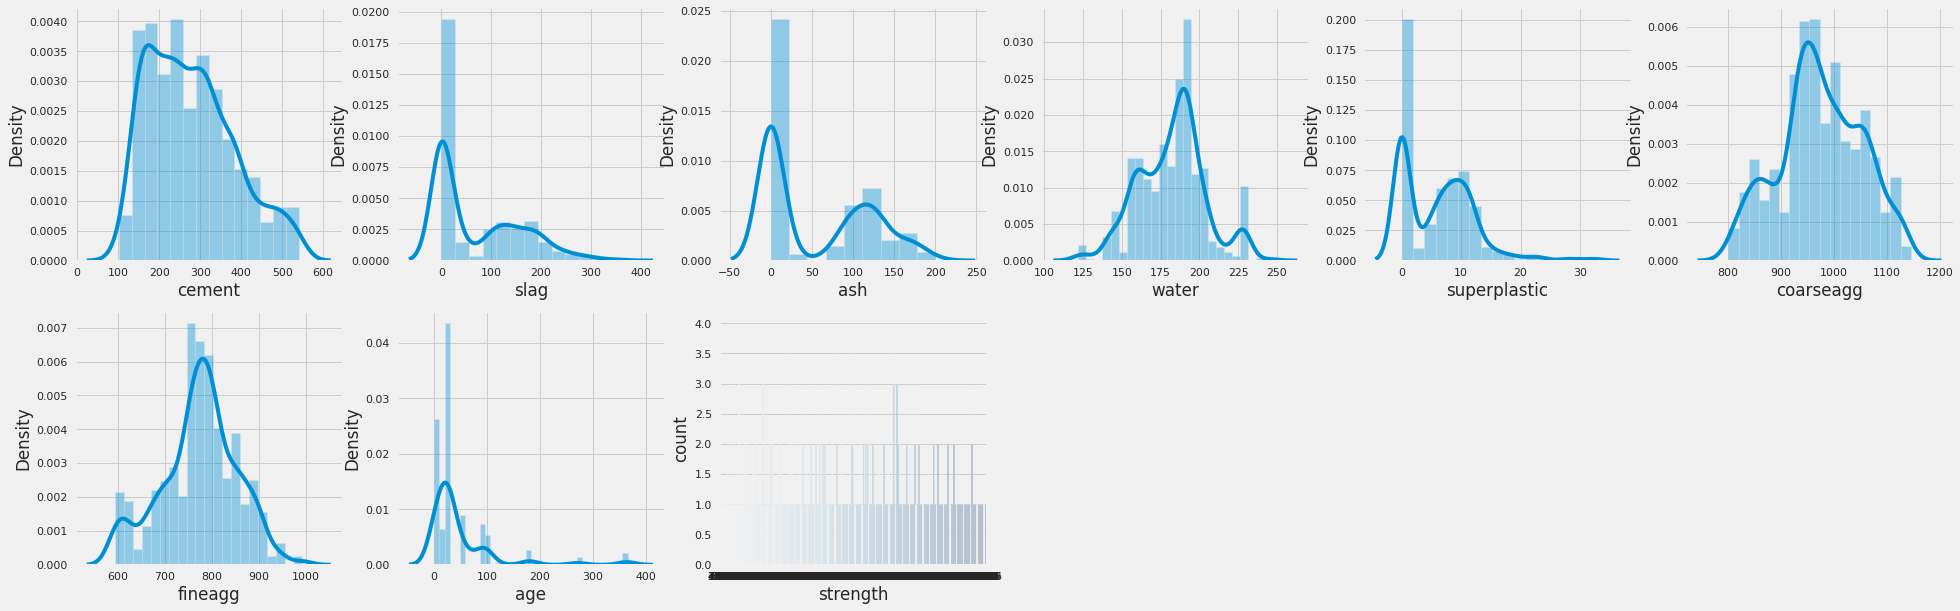

In [57]:
plt.figure(figsize= (30,20))  # Set the figure size
pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in df.columns:   # for-loop to iterate over every attribute whose distribution is to be visualized
    plt.subplot(4, 6, pos)   # plot grid
    if feature in ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']:   # Plot histogram for all the continuous columns
         sns.distplot(df[feature], kde= True )   
    else:
        sns.countplot(df[feature], palette= 'Blues')    # Plot bar chart for all the categorical columns
    pos += 1  # to plot over the grid one by one

Let's investagate each fearure distribution for each out come

A fundamental task in many statistical analyses is to characterize
the location and variability of a data set. A further
characterization of the data includes **skewness and kurtosis**.

**Skewness** is a measure of the asymmetry of a distribution. This value can be positive or negative.

- A negative skew indicates that the tail is on the left side of the distribution, which extends towards more negative values.
- A positive skew indicates that the tail is on the right side of the distribution, which extends towards more positive values.
- A value of zero indicates that there is no skewness in the distribution at all, meaning the distribution is perfectly symmetrical.

**Kurtosis** is a measure of whether the data are heavy-tailed
or light-tailed relative to a normal distribution. That is,
data sets with high kurtosis tend to have heavy tails, or
outliers. Data sets with low kurtosis tend to have light
tails, or lack of outliers. A uniform distribution would
be the extreme case

- The kurtosis of a normal distribution is 3.
- If a given distribution has a kurtosis less than 3, it is said to be **`playkurtic`**, which means it tends to produce fewer and less extreme outliers than the normal distribution.
- If a given distribution has a kurtosis greater than 3, it is said to be **`leptokurtic`**, which means it tends to produce more outliers than the normal distribution.


##  Univariate Analysis

In [58]:
# skewness along the index axis 
df.skew(axis = 0, skipna = True) 

cement          0.564959
slag            0.855225
ash             0.497231
water           0.034433
superplastic    0.980604
coarseagg      -0.065256
fineagg        -0.252353
age             3.253974
strength        0.395696
dtype: float64

In [59]:
# skewness along the index axis 
df.kurt(axis = 0, skipna = True) 

cement          -0.432458
slag            -0.407179
ash             -1.366694
water            0.167329
superplastic     1.695396
coarseagg       -0.583049
fineagg         -0.105881
age             11.961963
strength        -0.305309
dtype: float64

In [60]:
# find skewness in each row 
df.skew(axis = 1, skipna = True) 

0       1.501376
1       1.656966
2       1.428452
3       1.454175
4       1.673419
          ...   
1025    1.514958
1026    1.038994
1027    1.391064
1028    1.220244
1029    1.437394
Length: 1005, dtype: float64

In [61]:
# find skewness in each row 
df.kurt(axis = 1, skipna = True) 

0       1.002755
1       1.471520
2       0.446167
3       1.112233
4       1.924991
          ...   
1025    0.782298
1026   -0.836753
1027    0.409270
1028    0.660140
1029    1.379470
Length: 1005, dtype: float64

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will

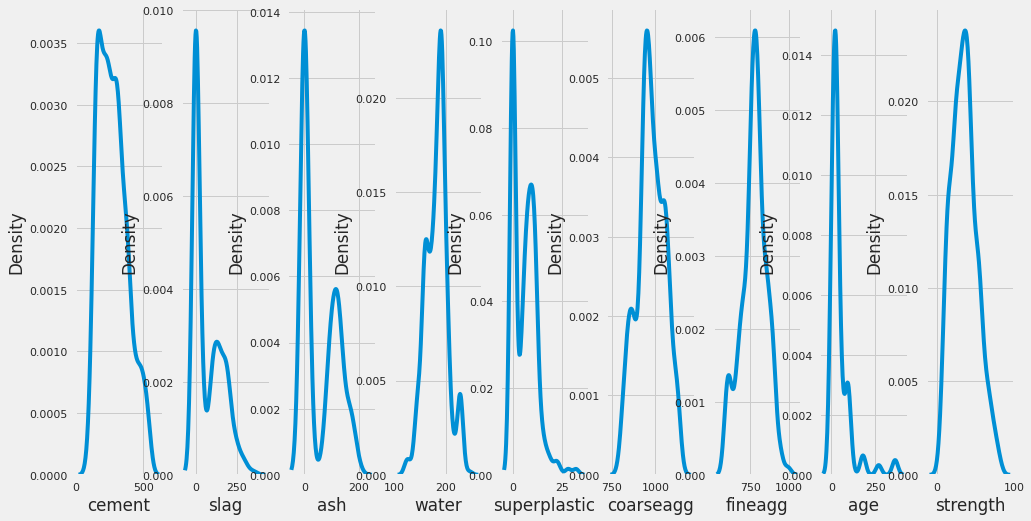

cement          0.564959
slag            0.855225
ash             0.497231
water           0.034433
superplastic    0.980604
coarseagg      -0.065256
fineagg        -0.252353
age             3.253974
strength        0.395696
dtype: float64


In [62]:
fig,ax=plt.subplots(1,9,figsize=(15,8))
sns.distplot(df['cement'],ax=ax[0],kde=True,hist=False)
sns.distplot(df['slag'],ax=ax[1],kde=True,hist=False)
sns.distplot(df['ash'],ax=ax[2],kde=True,hist=False)
sns.distplot(df['water'],ax=ax[3],kde=True,hist=False)
sns.distplot(df['superplastic'],ax=ax[4],kde=True,hist=False)
sns.distplot(df['coarseagg'],ax=ax[5],kde=True,hist=False)
sns.distplot(df['fineagg'],ax=ax[6],kde=True,hist=False)
sns.distplot(df['age'],ax=ax[7],kde=True,hist=False)
sns.distplot(df['strength'],ax=ax[8],kde=True,hist=False)
plt.show()
print(df.skew())

<p>In terms of distribution slag, ash, water, superplastic, coarseagg, fineagg , age are all multi gaussian which means they have multiple peaks and valleys. Strength seems to be normally distributed, cement has a slightly sharp multiple peaks.<p>

#### Tails

1. Cement seems to be normally distibuted
2. slag is slightly skewed towads right
3. ash is normally distributed
4. water is slighly skewd towards right
5. superlastic is skewd towards right
6. coarseagg is normally distributed
7. fineagg is normally distributed
8. age is slighly skewed positively
9. strength is normally distributed

In [63]:
print(df['cement'].astype(float).skew())
print(df['cement'].astype(float).kurt())

0.5649589710818719
-0.43245796791786795


<p>cement seems to have lower kurtosis, heavy tailed is on the right side of the distribution, which extends towards more positive values.<p>

In [64]:
print(df['slag'].astype(float).skew())
print(df['slag'].astype(float).kurt())

0.8552248976041231
-0.40717938297671585


<p>slag seems to have lower kurtosis, heavy tailed is on the right side of the distribution, which extends towards more positive values.<p>

In [65]:
print(df['ash'].astype(float).skew())
print(df['ash'].astype(float).kurt())

0.4972312662135868
-1.3666936376512488


<p>ash seems to have lower kurtosis, heavy tailed is on the right side of the distribution, which extends towards more positive values.<p>

In [66]:
print(df['water'].astype(float).skew())
print(df['water'].astype(float).kurt())

0.03443320802163803
0.16732903836419322


<p>water seems to have lower kurtosis, heavy tailed is on the right side of the distribution, which extends towards more positive values.<p>

In [67]:
print(df['superplastic'].astype(float).skew())
print(df['superplastic'].astype(float).kurt())

0.9806043204539714
1.695396036455214


<p>superplastic seems to have lower kurtosis, heavy tailed is on the right side of the distribution, which extends towards more positive values.<p>

In [68]:
print(df['coarseagg'].astype(float).skew())
print(df['coarseagg'].astype(float).kurt())

-0.06525599883507706
-0.5830486495364529


<p>coarseagg seems to have lower kurtosis, heavy tailed is on the left side of the distribution, which extends towards more negative values.<p>

In [69]:
print(df['fineagg'].astype(float).skew())
print(df['fineagg'].astype(float).kurt())

-0.2523531808980051
-0.10588130604972834


<p>fineagg seems to have lower kurtosis, heavy tailed is on the left side of the distribution, which extends towards more negative values.<p>

In [70]:
print(df['age'].astype(float).skew())
print(df['age'].astype(float).kurt())

3.253973717331205
11.96196342889929


<p>age seems to have higer kurtosis, heavy tailed is on the right side of the distribution, which extends towards more positive values and tend to produce more outliers.<p>

In [71]:
print(df['strength'].astype(float).skew())
print(df['strength'].astype(float).kurt())

0.39569613431539385
-0.3053086176667841


strength seems to have lower kurtosis, heavy tailed is on the right side of the distribution, which extends towards more positive values.

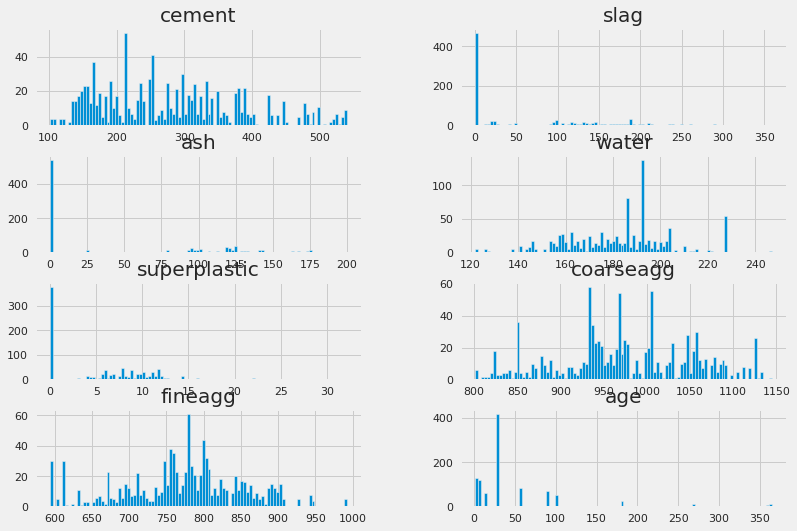

In [72]:
columns = list(df)[0:-1] # Excluding strength column 
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

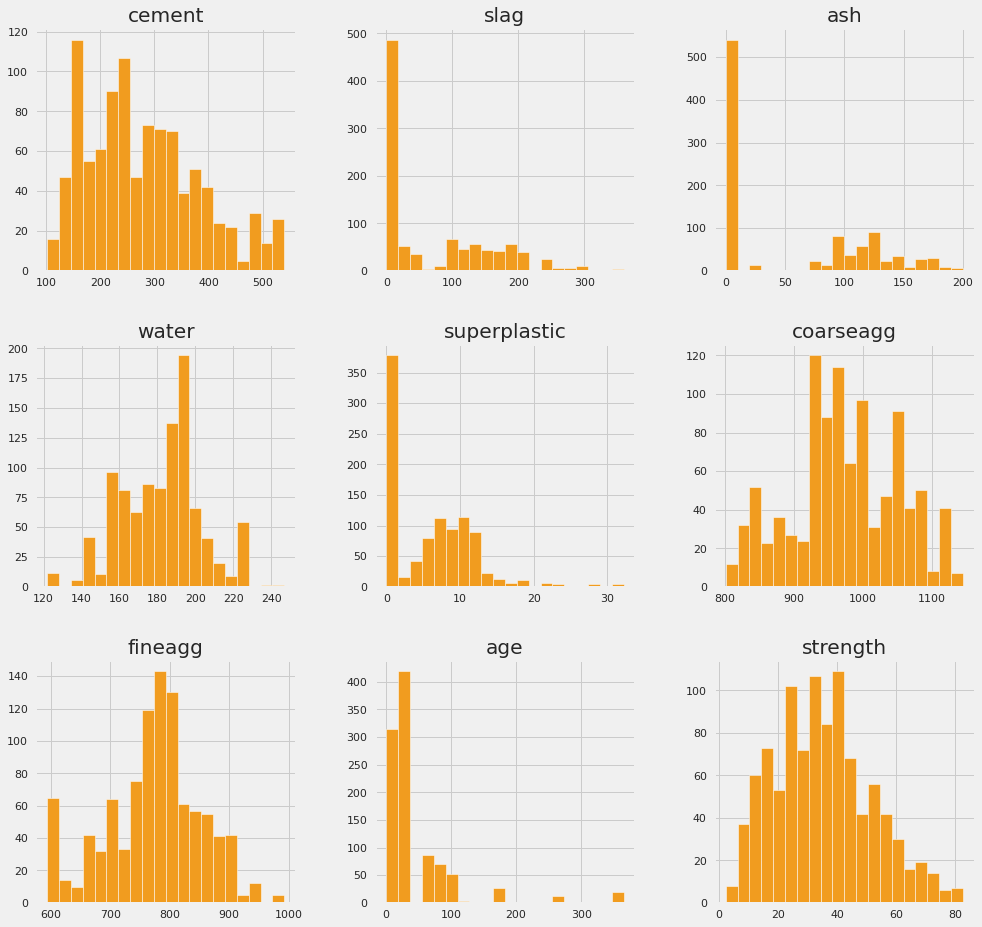

In [73]:
df.hist(bins=20,color = "#F19C1F",edgecolor='white',figsize = (15,15));

#### Check the presence of outliers through box plot

Outliers , are extreme values present in the data.There are outlires in our data for some columns as you can see from the below boxplot, Outliers have an impact on all ML algorithms. We should find ways to fix outliers

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

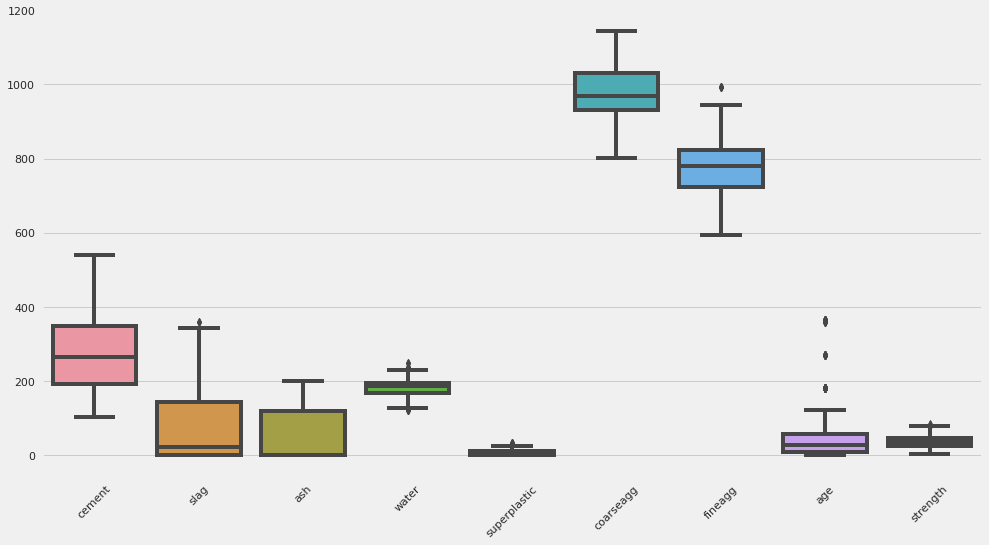

In [74]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.xticks(rotation=45)

## Outliers investigation of each column with the help of Box plots

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


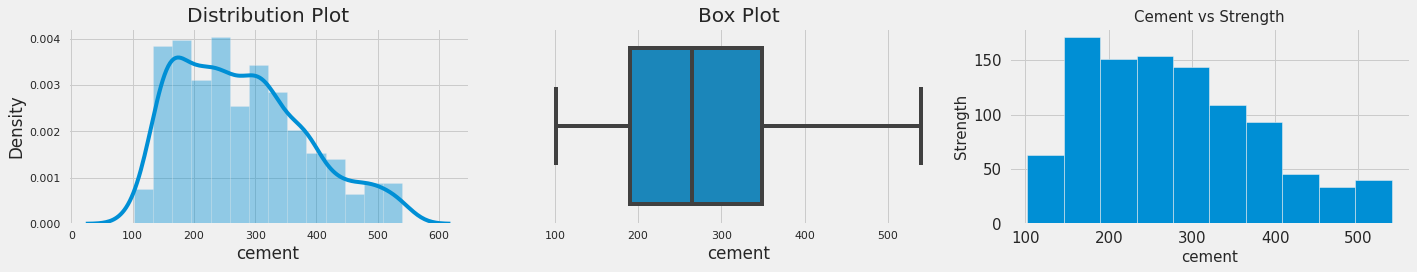

In [75]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(20,4)
sns.distplot(df['cement'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['cement'],ax=ax2)
ax2.set_title("Box Plot")

#histogram
ax3.hist(df['cement'])
ax3.set_xlabel('cement', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Cement vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [76]:
Q1=df['cement'].quantile(q=0.25)
Q3=df['cement'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['cement']))

1st Quartile (Q1) is:  190.7
3st Quartile (Q3) is:  349.0
Interquartile range (IQR) is  158.3


In [77]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in cement: ', L_outliers)
print('Upper outliers in cement: ', U_outliers)

Lower outliers in cement:  -46.75000000000003
Upper outliers in cement:  586.45


In [78]:
print('Number of outliers in cement upper : ', df[df['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower : ', df[df['cement']<-44.0625]['cement'].count())
print('% of Outlier in cement upper: ',round(df[df['cement']>586.4375]['cement'].count()*100/len(df)), '%')
print('% of Outlier in cement lower: ',round(df[df['cement']<-44.0625]['cement'].count()*100/len(df)), '%')

Number of outliers in cement upper :  0
Number of outliers in cement lower :  0
% of Outlier in cement upper:  0 %
% of Outlier in cement lower:  0 %


From above we can see that there are no outliers in `cement` column and it's looks like rightly skewed.

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


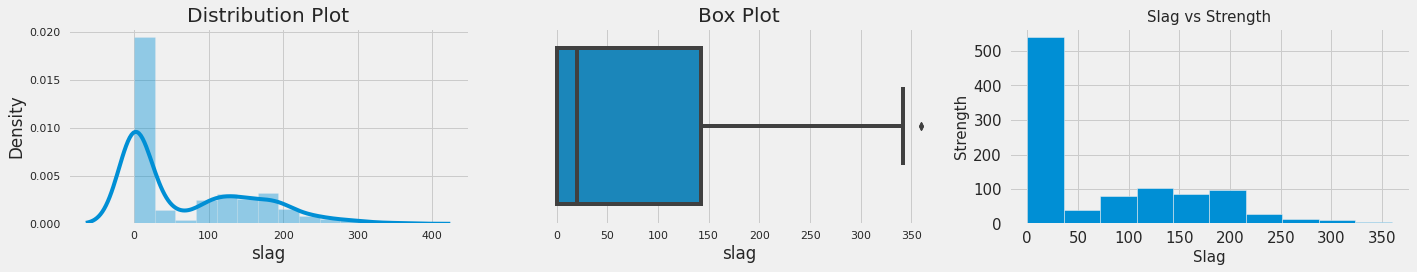

In [79]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(20,4)
sns.distplot(df['slag'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['slag'],ax=ax2)
ax2.set_title("Box Plot")

#histogram
ax3.hist(df['slag'])
ax3.set_xlabel('Slag', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Slag vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [80]:
Q1=df['slag'].quantile(q=0.25)
Q3=df['slag'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['slag']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  142.5
Interquartile range (IQR) is  142.5


In [81]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in cement: ', L_outliers)
print('Upper outliers in cement: ', U_outliers)

Lower outliers in cement:  -213.75
Upper outliers in cement:  356.25


In [82]:
print('Number of outliers in slag upper : ', df[df['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower : ', df[df['slag']<-214.424]['slag'].count())
print('% of Outlier in slag upper: ',round(df[df['slag']>357.375]['slag'].count()*100/len(df)), '%')
print('% of Outlier in slag lower: ',round(df[df['slag']<-214.424]['slag'].count()*100/len(df)), '%')

Number of outliers in slag upper :  2
Number of outliers in slag lower :  0
% of Outlier in slag upper:  0 %
% of Outlier in slag lower:  0 %


From above we can see that there are outliers in `slag` column and it's looks like rightly skewed.

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


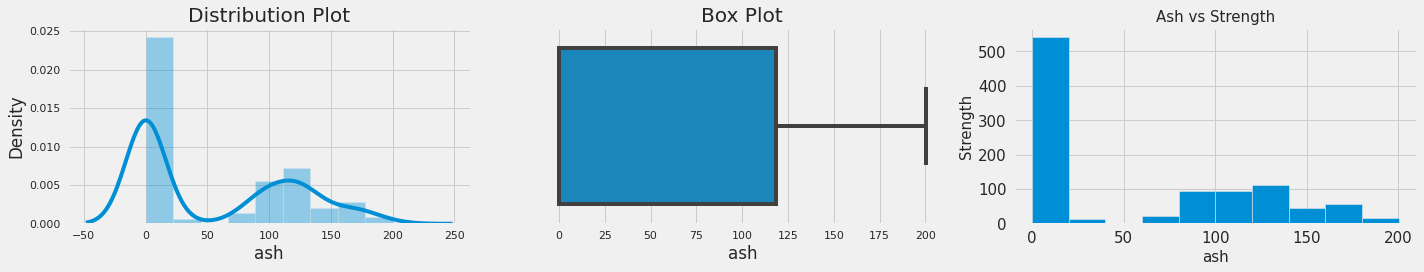

In [83]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(20,4)
sns.distplot(df['ash'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['ash'],ax=ax2)
ax2.set_title("Box Plot")

#histogram
ax3.hist(df['ash'])
ax3.set_xlabel('ash', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Ash vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [84]:
Q1=df['ash'].quantile(q=0.25)
Q3=df['ash'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['ash']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  118.3
Interquartile range (IQR) is  118.3


In [85]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in ash: ', L_outliers)
print('Upper outliers in ash: ', U_outliers)

Lower outliers in ash:  -177.45
Upper outliers in ash:  295.75


In [86]:
print('Number of outliers in ash upper : ', df[df['ash']>295.75]['ash'].count())
print('Number of outliers in ash lower : ', df[df['ash']<-177.45]['ash'].count())
print('% of Outlier in ash upper: ',round(df[df['ash']>295.75]['ash'].count()*100/len(df)), '%')
print('% of Outlier in ash lower: ',round(df[df['ash']<-177.45]['ash'].count()*100/len(df)), '%')

Number of outliers in ash upper :  0
Number of outliers in ash lower :  0
% of Outlier in ash upper:  0 %
% of Outlier in ash lower:  0 %


From above we can see that there are outliers in `ash` column and it's looks like rightly skewed.

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


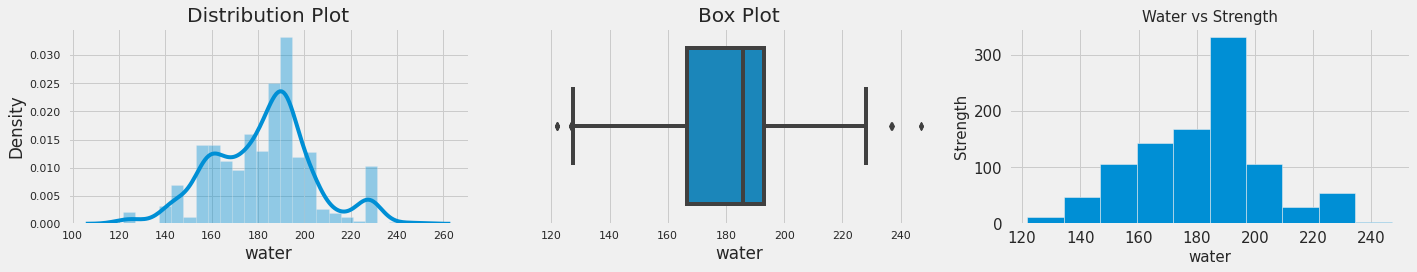

In [87]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(20,4)
sns.distplot(df['water'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['water'],ax=ax2)
ax2.set_title("Box Plot")

#histogram
ax3.hist(df['water'])
ax3.set_xlabel('water', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Water vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [88]:
Q1=df['water'].quantile(q=0.25)
Q3=df['water'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['water']))

1st Quartile (Q1) is:  166.6
3st Quartile (Q3) is:  192.9
Interquartile range (IQR) is  26.30000000000001


In [89]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in water: ', L_outliers)
print('Upper outliers in water: ', U_outliers)

Lower outliers in water:  127.14999999999998
Upper outliers in water:  232.35000000000002


In [90]:
print('Number of outliers in water upper : ', df[df['water']>232.65]['water'].count())
print('Number of outliers in water lower : ', df[df['water']<124.25]['water'].count())
print('% of Outlier in water upper: ',round(df[df['water']>232.65]['water'].count()*100/len(df)), '%')
print('% of Outlier in water lower: ',round(df[df['water']<124.25]['water'].count()*100/len(df)), '%')

Number of outliers in water upper :  4
Number of outliers in water lower :  5
% of Outlier in water upper:  0 %
% of Outlier in water lower:  0 %


From above we can see that there are outliers in `water`  and it's looks like normal distribution.

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


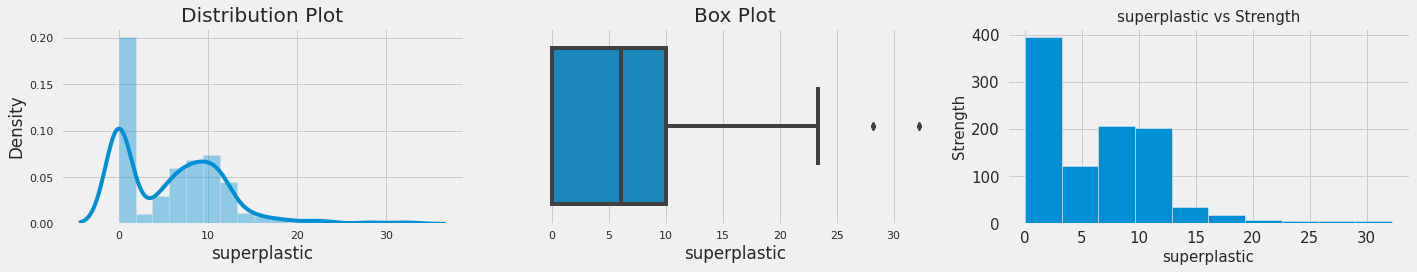

In [91]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(20,4)
sns.distplot(df['superplastic'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['superplastic'],ax=ax2)
ax2.set_title("Box Plot")

#histogram
ax3.hist(df['superplastic'])
ax3.set_xlabel('superplastic', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('superplastic vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [92]:
Q1=df['superplastic'].quantile(q=0.25)
Q3=df['superplastic'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['superplastic']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  10.0
Interquartile range (IQR) is  10.0


In [93]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in superplastic: ', L_outliers)
print('Upper outliers in superplastic: ', U_outliers)

Lower outliers in superplastic:  -15.0
Upper outliers in superplastic:  25.0


In [94]:
print('Number of outliers in superplastic upper : ', df[df['superplastic']>25.5]['superplastic'].count())
print('Number of outliers in superplastic lower : ', df[df['superplastic']<-15.3]['superplastic'].count())
print('% of Outlier in superplastic upper: ',round(df[df['superplastic']>25.5]['superplastic'].count()*100/len(df)), '%')
print('% of Outlier in superplastic lower: ',round(df[df['superplastic']<-15.3]['superplastic'].count()*100/len(df)), '%')

Number of outliers in superplastic upper :  10
Number of outliers in superplastic lower :  0
% of Outlier in superplastic upper:  1 %
% of Outlier in superplastic lower:  0 %


From above we can see that there are outliers in `superplastic` column and it's looks like rightly skewed.

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


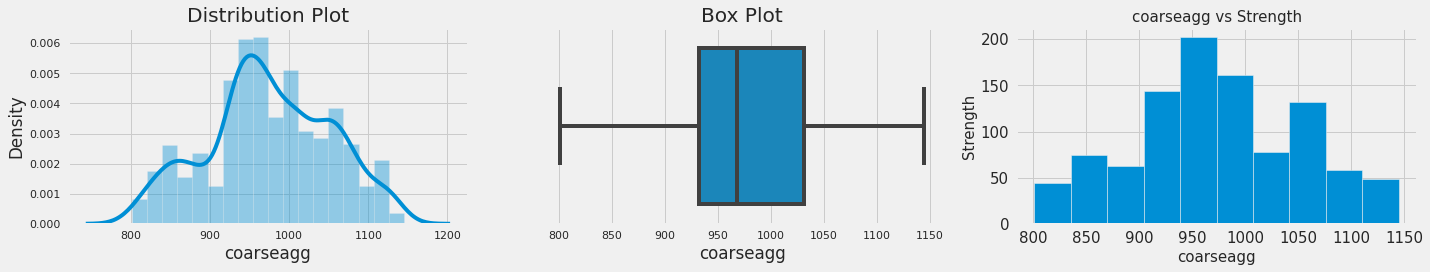

In [95]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(20,4)
sns.distplot(df['coarseagg'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['coarseagg'],ax=ax2)
ax2.set_title("Box Plot")

#histogram
ax3.hist(df['coarseagg'])
ax3.set_xlabel('coarseagg', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('coarseagg vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [96]:
Q1=df['coarseagg'].quantile(q=0.25)
Q3=df['coarseagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['coarseagg']))

1st Quartile (Q1) is:  932.0
3st Quartile (Q3) is:  1031.0
Interquartile range (IQR) is  99.0


In [97]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in coarseagg: ', L_outliers)
print('Upper outliers in coarseagg: ', U_outliers)

Lower outliers in coarseagg:  783.5
Upper outliers in coarseagg:  1179.5


In [98]:
print('Number of outliers in coarseagg upper : ', df[df['coarseagg']>1175.5]['coarseagg'].count())
print('Number of outliers in coarseagg lower : ', df[df['coarseagg']<785.9]['coarseagg'].count())
print('% of Outlier in coarseagg upper: ',round(df[df['coarseagg']>1175.5]['coarseagg'].count()*100/len(df)), '%')
print('% of Outlier in coarseagg lower: ',round(df[df['coarseagg']<785.9]['coarseagg'].count()*100/len(df)), '%')

Number of outliers in coarseagg upper :  0
Number of outliers in coarseagg lower :  0
% of Outlier in coarseagg upper:  0 %
% of Outlier in coarseagg lower:  0 %


From above we can see that there are no outliers in `coarseagg`  and it's looks like normal distribution.

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


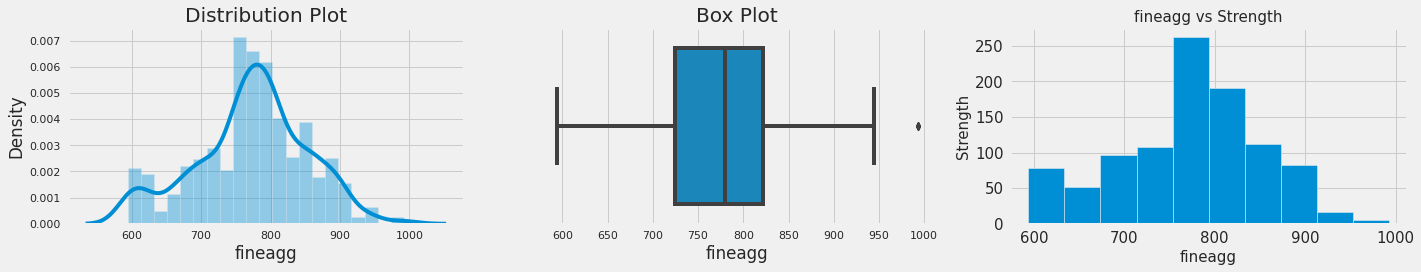

In [99]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(20,4)
sns.distplot(df['fineagg'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['fineagg'],ax=ax2)
ax2.set_title("Box Plot")

#histogram
ax3.hist(df['fineagg'])
ax3.set_xlabel('fineagg', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('fineagg vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

From above we can see that there are outliers in `fineaggregate`  and it's looks like normal distribution.

In [100]:
Q1=concrete_df['fineagg'].quantile(q=0.25)
Q3=concrete_df['fineagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['fineagg']))

1st Quartile (Q1) is:  730.9499999999999
3st Quartile (Q3) is:  824.0
Interquartile range (IQR) is  93.05000000000007


In [101]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in fineagg: ', L_outliers)
print('Upper outliers in fineagg: ', U_outliers)

Lower outliers in fineagg:  591.3749999999998
Upper outliers in fineagg:  963.575


In [102]:
print('Number of outliers in fineagg upper : ', concrete_df[concrete_df['fineagg']>963.575]['fineagg'].count())
print('Number of outliers in fineagg lower : ', concrete_df[concrete_df['fineagg']<591.37]['fineagg'].count())
print('% of Outlier in fineagg upper: ',round(concrete_df[concrete_df['fineagg']>963.575]['fineagg'].count()*100/len(concrete_df)), '%')
print('% of Outlier in fineagg lower: ',round(concrete_df[concrete_df['fineagg']<591.37]['fineagg'].count()*100/len(concrete_df)), '%')

Number of outliers in fineagg upper :  5
Number of outliers in fineagg lower :  0
% of Outlier in fineagg upper:  0 %
% of Outlier in fineagg lower:  0 %


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


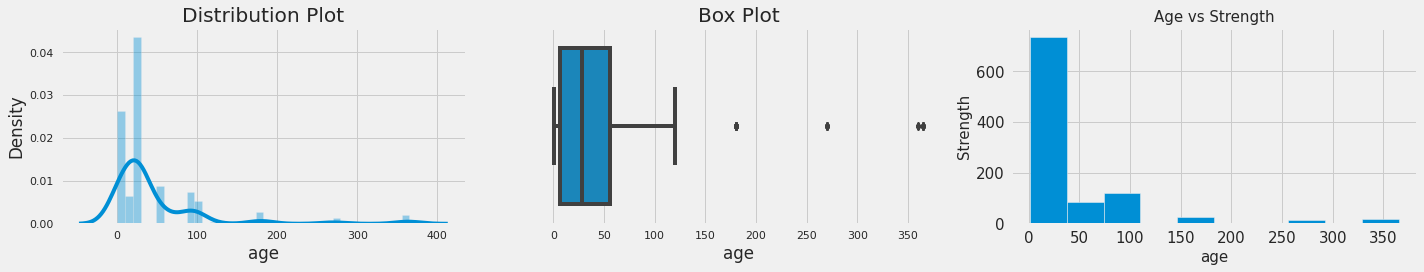

In [103]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(20,4)
sns.distplot(df['age'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df['age'],ax=ax2)
ax2.set_title("Box Plot")

#histogram
ax3.hist(df['age'])
ax3.set_xlabel('age', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Age vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

From above we can see that there are outliers in `water` column and it's looks like left skewed.

In [104]:
Q1=df['age'].quantile(q=0.25)
Q3=df['age'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['age']))

1st Quartile (Q1) is:  7.0
3st Quartile (Q3) is:  56.0
Interquartile range (IQR) is  49.0


In [105]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in age: ', L_outliers)
print('Upper outliers in age: ', U_outliers)

Lower outliers in age:  -66.5
Upper outliers in age:  129.5


In [106]:
print('Number of outliers in age upper : ', df[df['age']>129.5]['age'].count())
print('Number of outliers in age lower : ', df[df['age']<-66.5]['age'].count())
print('% of Outlier in age upper: ',round(df[df['age']>129.5]['age'].count()*100/len(df)), '%')
print('% of Outlier in age lower: ',round(df[df['age']<-66.5]['age'].count()*100/len(df)), '%')

Number of outliers in age upper :  59
Number of outliers in age lower :  0
% of Outlier in age upper:  6 %
% of Outlier in age lower:  0 %


From above we can see that there are outliers in `age` column and it's looks like rightly skewed.

## Multivariate Analysis

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Ple

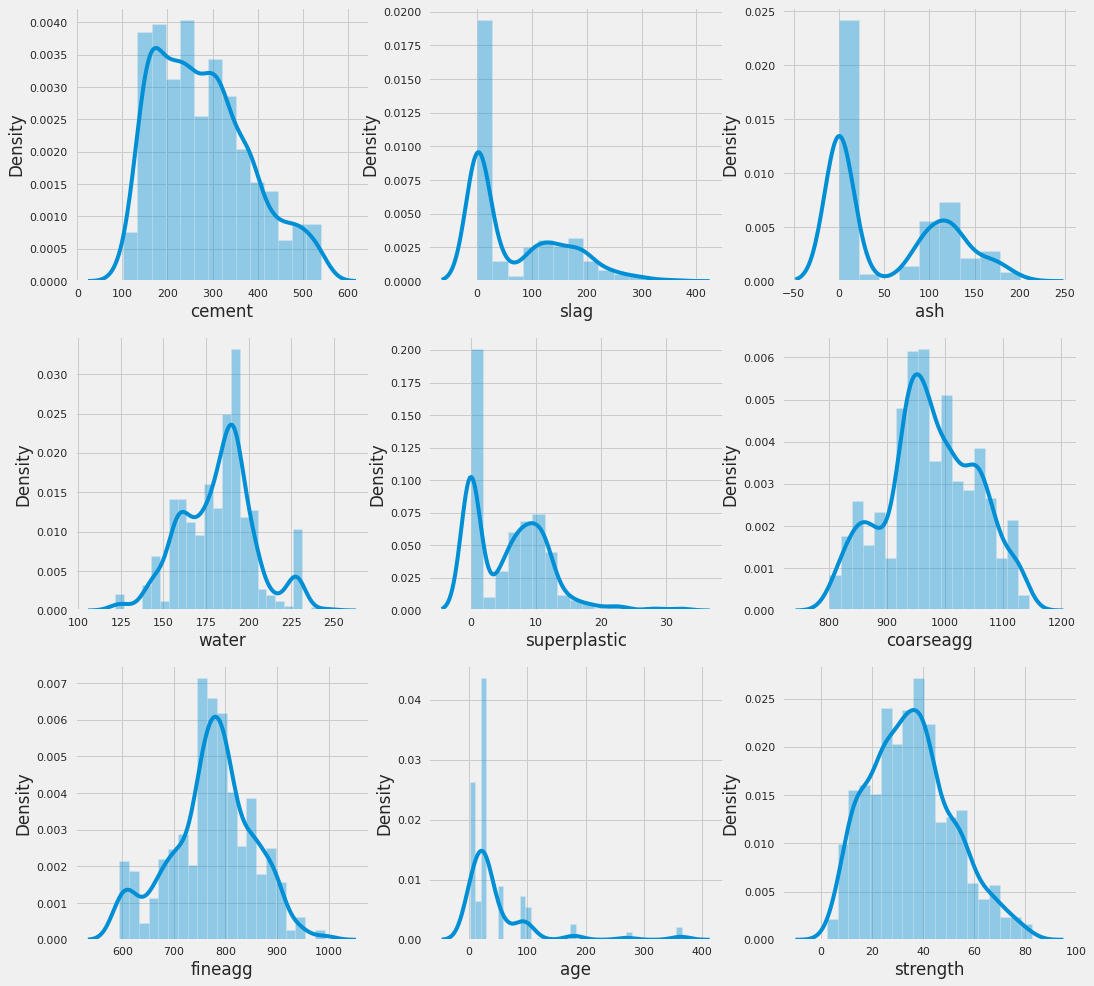

In [107]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(df['cement'],ax=ax2[0][0])
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
sns.distplot(df['water'],ax=ax2[1][0])
sns.distplot(df['superplastic'],ax=ax2[1][1])
sns.distplot(df['coarseagg'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
sns.distplot(df['strength'],ax=ax2[2][2])

 We can see observe that :
- cement is almost normal. 
- slag has  three gausssians and rightly skewed.
- ash has two gaussians and rightly skewed.
- water has three guassians and slighly left skewed.
- superplasticizer has two gaussians and rightly skewed.
- coarseaggregate has three guassians and almost normal.
- fineaggregate has almost two guassians and looks like normal.
- age has multiple guassians and rightly skewed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b611fa6d8>,
      dtype=object)

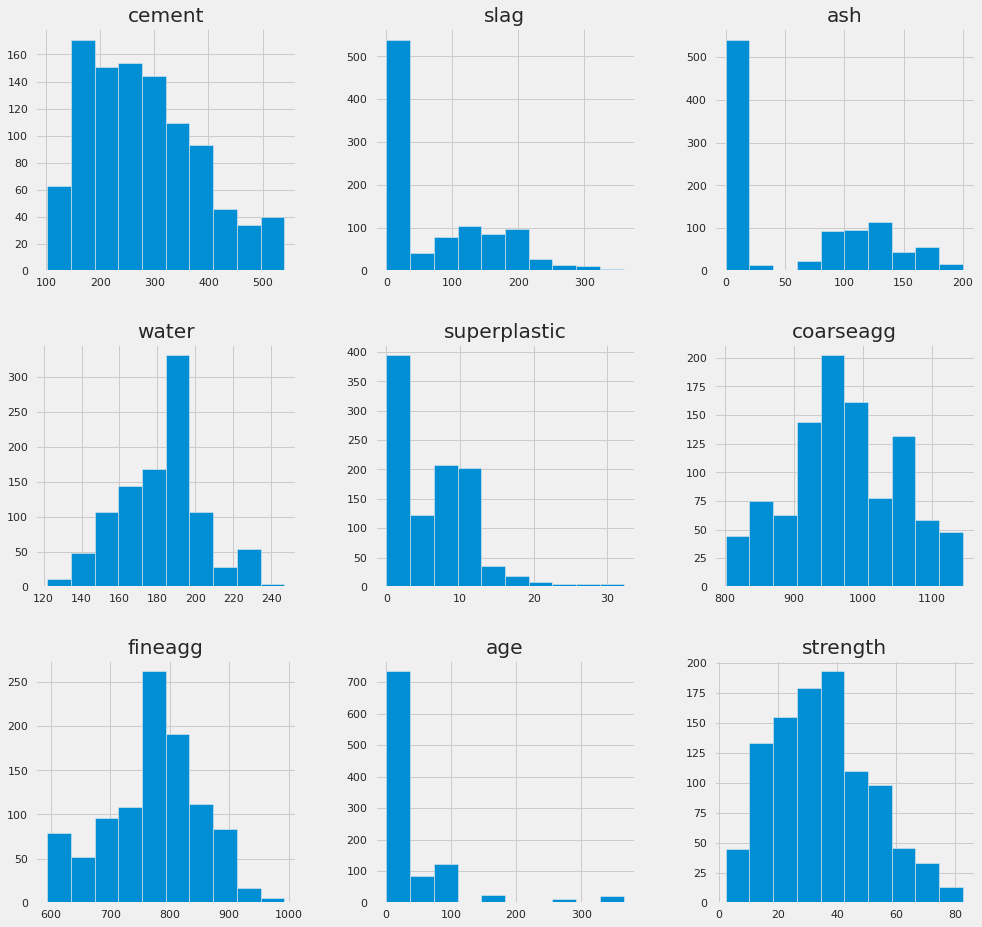

In [108]:
# Histogram 
df.hist(figsize=(15,15))

In [ ]:
# pairplot- plot density curve instead of histogram in diagonal
sns.pairplot(concrete_df, diag_kind='kde')  

#### Pair plot analysis:

1. Along the Diagonal, our data has 2-3 gaussians for all the predictor variables. We should do a cluster analysis to understand the grouping and hidden pattern in data.
2. Our predictors have some reationship and dependencies with target.
3. From the correlation matrix we could infer that , our variables have less correraltion between each other. This is good, as most ML algorithms assume variables are independent of each other for better prediction.

In [ ]:
#'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.offline as py
init_notebook_mode(connected=True)
import os
%pylab inline

fig = px.scatter_matrix(df, dimensions=["cement", "slag", "ash", "water", "superplastic", "coarseagg", 
                                        "fineagg", "age", "strength"], color="strength",height=600, width=1000)
fig.show()

### strength attribute : Relationship between dependent and independent attributes
strength: Now its comparing the target column with all other independent attributes and its showing us very vital information.
- strength vs cement: It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Which one should we pick we don't know. Hence Cement though it has positive relationship with the strength, it is not a very good predictor. It is a weak predictor.
- strength vs slag: There is no particular trend.
- strength vs slag: There is also no particular trend.
- strength vs age: For a given value of age, we have different values of strength. Hence, It is not a good predictor.
- strength vs superplasticizer:For a given value of age, we have different values of strength. Hence, It is not a good predictor.
- Other attributes does not give any strong relationship with strength.

Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.

### Correlation Between Features

In [ ]:
# corrlation matrix 
cor=df.corr()
cor

In [ ]:
corr = df.corr(method="kendall")
corr = corr.stack()
corr = corr.loc[
    [tup for tup in corr.index if tup[0] != tup[1]]
]  # remove pairs of itself
threshold = 0.75
high_corr = corr[(abs(corr) > threshold)]
abs_high_corr = abs(high_corr)[::2]
pairs = abs_high_corr.sort_values(ascending=False).index.to_list()
print(f"Correlated features: {pairs if len(pairs) > 0 else None}")

In [ ]:
Cor_Matrix=df.corr().abs()
Cor_Matrix
upper_tri = Cor_Matrix.where(np.triu(np.ones(Cor_Matrix.shape),k=1).astype(np.bool))
#print(upper_tri)
to_drop =[column for column in upper_tri.columns if any(upper_tri[column] > 0.60)]

print("The columns those have more than 0.6 correlation is :",to_drop[0:6])

In [ ]:
# data = data[selected_columns]

In [ ]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

In [ ]:
# Correlation among the attributes

corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

In [ ]:
corr_matrix = df.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f", cmap = "viridis", figsize=(11,11))
plt.title("Correlation Between Features")
plt.show()

In [ ]:
#find the correlation between independent variables
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.ioff()

As observed while analysing pairplot; there doesn't seem to be very high correlation between independent attributes. However, the following attributes appear to have some correlation

- There appear to correlation between Superplasticizer and water
- There seem to be some correlation between water and fineaggregate
- There seem to be some correlation between cement and strength
- There seem to be some correlation between ash and Superplasticizer

Scaling: There are 2 scales in the independent attributes (kg/m3 and days). We will scale the data in the next sections

In [ ]:
### Analyzing Dependent variable (Strength) vs Independent variable (cement, age and water)
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(y="strength", x="cement", hue="water", size="age", data=df, ax=ax, sizes=(50, 300),
                palette='RdYlGn', alpha=0.9)
ax.set_title("Strength vs Cement, Age, Water")
ax.legend()
plt.show()

Observation:

- Strength correlates positively with Cement
- Strength correlates positively with Age, though less than Cement
- Older Cement tends to require more Water, as shown by the larger green data points
- Strength correlates negatively with Water
- High Strength with a low Age requires more Cement

In [ ]:
## Analyzing Dependent variable (Strength) vs Independent variable (fineaggregate, Ash, Superplasticizer)
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(y="strength", x="fineagg", hue="ash", size="superplastic", data=df, ax=ax, sizes=(50, 300),
                palette='RdYlBu', alpha=0.9)
ax.set_title("Strength vs fineagg, Ash, Superplastic")
ax.legend(loc="upper left", bbox_to_anchor=(1,1)) # Moved outside the chart so it doesn't cover any data
plt.show()

Observation:

- strength doesnt have any clear correlation with ash
- strength correlates positively with superplastic

## Removing Outliers after checking missing values

In [ ]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)

IQR=Q3-Q1
IQR

In [ ]:
S = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
S.info()

In [ ]:
plt.figure(figsize=(12,12))
sns.boxplot(data=S)
plt.show()

In [ ]:
# again check for outliers in dataset after handling missing values using boxplot
df.boxplot(figsize=(35,15))

* It also shows that slag, ash, water superplasticizer, and age contains outliers.

In [ ]:
#Number of outliers present in the dataset
print('Number of outliers in cement: ',df[((df.cement - df.cement.mean()) / df.cement.std()).abs() >3]['cement'].count())
print('Number of outliers in slag: ',df[((df.slag - df.slag.mean()) / df.slag.std()).abs() >3]['slag'].count())
print('Number of outliers in ash: ',df[((df.ash - df.ash.mean()) / df.ash.std()).abs() >3]['ash'].count())
print('Number of outliers in water: ',df[((df.water - df.water.mean()) / df.water.std()).abs() >3]['water'].count())
print('Number of outliers in superplastic: ',df[((df.superplastic - df.superplastic.mean()) / df.superplastic.std()).abs() >3]['superplastic'].count())
print('Number of outliers in coarseagg: ',df[((df.coarseagg - df.coarseagg.mean()) / df.coarseagg.std()).abs() >3]['coarseagg'].count())
print('Number of outliers in fineagg: ',df[((df.fineagg - df.fineagg.mean()) / df.fineagg.std()).abs() >3]['fineagg'].count())
print('Number of outliers in age: ',df[((df.age - df.age.mean()) / df.age.std()).abs() >3]['age'].count())

* Here, we have used Standard deviation method to detect the outliers.If we have any data point that is more than 3 times the standard deviation, then those points are very likely to be outliers.
* We can see that slag, water, superplastic and age contain outliers.

In [ ]:
#Records which contains the outliers in slag attribute
print('Records containing outliers in slag: \n',df[((df.slag - df.slag.mean()) / df.slag.std()).abs() >3]['slag'])

In [ ]:
#Records which contains the outliers in water attribute
print('Records containing outliers in water: \n',df[((df.water - df.water.mean()) / df.water.std()).abs() >3]['water'])

In [ ]:
#Records which contains the outliers in superplasticizer attribute
print('Records containing outliers in superplastic: \n',df[((df.superplastic - df.superplastic.mean()) / df.superplastic.std()).abs() >3]['superplastic'])

In [ ]:
#Records which contains the outliers in age attribute
print('Records containing outliers in age: \n',df[((df.age - df.age.mean()) / df.age.std()).abs() >3]['age'])

In [ ]:
#Replacing the outliers by median
for col_name in df.columns[:-1]:
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    df.loc[(df[col_name] < low) | (df[col_name] > high), col_name] = df[col_name].median()

In [ ]:
# again check for outliers in dataset using boxplot
df.boxplot(figsize=(35,15))

In [ ]:
def outliar_detection(col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    df[col][df[col]> Upper_Whisker] = np.nan
    df[col][df[col]< Lower_Whisker] = np.nan
    return df[col][df[col].isnull()]

In [ ]:
usecols =[i for i in df.columns if i != 'strength']
for i in usecols:
    outliar_detection(i)

In [ ]:
df.info()

In [ ]:
# Imputing the missing values with median
columns=df.columns
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

imp_median.fit_transform(df)
# imp_median.fit(df)
df_outliers_removed=pd.DataFrame(imp_median.transform(df))
df_outliers_removed.columns=columns

In [ ]:
# Attributes in the Group
Atr1g1='cement'
Atr2g1='slag'
Atr3g1='ash'
Atr4g1='water'
Atr5g1='superplastic'
Atr6g1='coarseagg'
Atr7g1='fineagg'
Atr8g1='age'
Atr9g1='strength'

In [ ]:
df=df_outliers_removed
fig, ax = plt.subplots(1,9,figsize=(38,16)) 
sns.boxplot(x=Atr1g1,data=df,ax=ax[0],orient='v') 
sns.boxplot(x=Atr2g1,data=df,ax=ax[1],orient='v')
sns.boxplot(x=Atr3g1,data=df,ax=ax[2],orient='v')
sns.boxplot(x=Atr4g1,data=df,ax=ax[3],orient='v')
sns.boxplot(x=Atr5g1,data=df,ax=ax[4],orient='v')
sns.boxplot(x=Atr6g1,data=df,ax=ax[5],orient='v')
sns.boxplot(x=Atr7g1,data=df,ax=ax[6],orient='v')
sns.boxplot(x=Atr8g1,data=df,ax=ax[7],orient='v')
sns.boxplot(x=Atr9g1,data=df,ax=ax[8],orient='v')

When we remove outliers and replace with median, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them

# Cleaning Report

In [ ]:
print('df shape: {}, new df shape: {}, we lost {} rows, {}% of our data'.format(concrete_df.shape[0], df.shape[0],
                                                              concrete_df.shape[0]-df.shape[0],
                                                        (concrete_df.shape[0]-df.shape[0])/concrete_df.shape[0]*100))

# Feature Engineering, Model Building and Model Tuning

Feature Engineering:

In [ ]:
df.head()

## Deletion of features.

- We will leverage PCA for dimensionality reduction.
- The approach we are going to follow is; we will build 2 sets of models;
* One without deletion of any attributes and
* Second - reducing attributes by leveraging PCA
* They we will decide whether we will recommend the model with dimensionality reduction or without dimensionality reduction

In [ ]:
# It is always better to make a copy of the data before applying any transformation on data
df_new_copy=df.copy()

In [ ]:
df_new_copy_scaled=df_new_copy.apply(zscore)
X_scaled=df_new_copy_scaled.drop('strength',axis=1)


In [ ]:
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(concrete_df, ax=ax[0])
ax[0].set_title("Original Data")
# sns.distplot(X_scaled, ax=ax[1])
sns.distplot(X_scaled, ax=ax[1])
ax[1].set_title("Scaled data")

In [ ]:
covMatrix = np.cov(X_scaled,rowvar=False)

In [ ]:
# choosing PCA components to be 8 and fitting it on the scaled data. 
#The count of 8 has been selected randomly to check the variance explained by 8 components; 
#We will finalize the components basis the count of components required to explain 95% variance
pca = PCA(n_components=8)
pca.fit(X_scaled)

In [ ]:
#Computing the eigen Values
print(pca.explained_variance_)

In [ ]:
#Lets compute the eigen Vectors
print(pca.components_)

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
plt.bar(list(range(1,9)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

In [ ]:
plt.step(list(range(1,9)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [ ]:
# cumulating explained variance ratio to identify how many principal components are required to explain 95% of the variance
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
# print("Cumulative Variance Explained", cum_var_exp)
pd.DataFrame(cum_var_exp,columns=['Cumul Variance Explanation'],index=['1','2','3','4','5','6','7','8'])

**6 components explains over 95% of the variance. Hence we will take 6 components**

In [ ]:
pca6 = PCA(n_components=6)
pca6.fit(X_scaled)
print(pca6.components_)
print(pca6.explained_variance_ratio_)
Xpca6 = pca6.transform(X_scaled)
Y = df_new_copy_scaled['strength']

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca=train_test_split(Xpca6,Y,test_size=0.30,random_state=1)

In [ ]:
# lets check split of data

print("{0:0.2f}% data is in training set".format((len(X_train_pca)/len(df_new_copy.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test_pca)/len(df_new_copy.index)) * 100))

### Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help

we will begin our model building considering linear regression; basis the performance of the algorithm, we will try other model. We will also try polynomial regression algorithm with different degree of freedom.

We will train the following regression algorithms:
1. Linear Regression
2. SVR
3. Ridge Regression
4. Lasso Regression
5. Polynomial Regression
5. Decision Tree
6. Random Forest
7. Bagging
8. Ada Boost
9. Gradient Boost

### Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength

- It appears that in the dataset there are 3 to 4 Gaussians since for multiple variables (slag, ash, superplastic) there are 2 or more gaussians or 2 clusters hidden in the data set as density plot of multiple attributes has bi-modal distribution.
- We will do cluster analysis to understand any hidden patterns or hidden clusters in the data set. Hence, to begin with we will consider that the dataset has 2-6 clusters (as seen from the pair plot; there are atleast 2 Gaussians). Then we will finalize the cluster leveraging elbow plots.

In [ ]:
k_df=df.copy()

In [ ]:
# expect 3 to four clusters from the pair plot visual inspection hence restricting from 2 to 5

cluster_range = range( 2, 6 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(k_df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

In [ ]:
# Elbow plot to ascertain the number of clusters

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

**The elbow plot confirms our visual analysis that there are likely 3 good clusters**

In [ ]:
k_df_z = k_df.apply(zscore)

cluster = KMeans( n_clusters = 3, random_state = 1 )
cluster.fit(k_df_z)

prediction=cluster.predict(k_df_z)
k_df_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

k_df_z_copy = k_df_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [ ]:
centroids = cluster.cluster_centers_
centroids

In [ ]:
centroid_df = pd.DataFrame(centroids, columns = list(k_df) )
centroid_df

In [ ]:
k_df_z.boxplot(by = 'GROUP',figsize = (40,18), layout = (2,15));

- we notice that there are outliars; However, we had resolved outliars earlier and replaced with median. When we solve for outliars, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them. Hence, we will ignore these outliars

In [ ]:
### strength Vs cement

var = 'cement'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=k_df_z,hue='GROUP')
plot.set(ylim = (-3,3));

The more horizontal the line is, the more weak the independent variable is in predicting the target variable

Observation:

- For cluster 2 (orange line) and cluster 3 (green line), there seem to be some positive relationship between strength and cement.
- cluster 1 represented by blue line appear to be straight line which means that for cluster 1, strength is weakly predicted by cement.

So cement may not be a good predictor for all the 3 clusters

In [ ]:
# strength Vs water

var = 'water'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=k_df_z,hue='GROUP')
plot.set(ylim = (-3,3));

Observation:

- For group 1 (blue) and group 2 (orange), there seem to be some negative relationship between strength and water
group 3 represented by red line appear have a positive relationship
- So 2 clusters seem to have negative relationship while 1 cluster seem to positive relationship. Hence, water may not be a good predictor for all the 3 clusters

In [ ]:
# strength Vs fineagg

var = 'fineagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=k_df_z,hue='GROUP')
plot.set(ylim = (-3,3))

Observation:

- group 3 (red line) seems to represent good relationship between strength and fineagg
- For group 1 (blue) and group 2 (orange), there appear to be straight line which means that for group 1 and 2, strength is weakly predicted by fineagg.
- So fineaggregate may not be a good predictor for all the 3 clusters

In [ ]:
# strength Vs slag

var = 'slag'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=k_df_z,hue='GROUP')
plot.set(ylim = (-3,3));

Observation:

- For all 3 clusters, there appear to be straight line which means that for group 1,2 and 3 strength is weakly predicted by slag.
- So slag may not be a good predictor for all the 3 clusters

In [ ]:
# strength Vs ash

var = 'ash'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=k_df_z,hue='GROUP')
plot.set(ylim = (-3,3));

Observation:

- For group 3 (red line) seems to represent slight postive relationship between strength and ash
-  For group 2 (orange), there appear to be straight line which means that for group 1 and 2, strength is weakly predicted by ash.
- For group 1 (blue line), there appear to be slight negative relationship between strengh and ash

So ash may not be a good predictor for all the 3 clusters

In [ ]:
# strength Vs Superplastic

var = 'superplastic'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=k_df_z,hue='GROUP')
plot.set(ylim = (-3,3));

Observation:

- For cluster 2 (orange line) and cluster 3 (red line), there appears to be slight relationship between superplasticizer and strength.
- For cluster 1 (blue), there appear to be straight line which means that for group 1, strength is weakly predicted by superplastic.
- So superplasticizer may not be a good predictor for all the 3 clusters

In [ ]:
# strength Vs Coarse Aggregate

var = 'coarseagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=k_df_z,hue='GROUP')
plot.set(ylim = (-3,3));

Observation:

- For all 3 clusters, there appear to be straight line which means that for group 1,2 and 3 strength is weakly predicted by coarseaggregate.
- So coarseaggregate may not be a good predictor for all the 3 clusters

In [ ]:
# strength Vs age

var = 'age'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=k_df_z,hue='GROUP')
plot.set(ylim = (-3,3));

Observation:

- For all 3 clusters, there appear to be some relationship between strength and age. Hence, age can be considered as an attribute which can predict strength for all 3 clusters.

From the dataset it is quite evident that for independent variables, there are 2 scales e.g: kg/m3, days. Now, Machine learning algorithms don't recognize the unit of data; Hence, it won't be prudent to compare Kg/m3 with age. Higher ranging numbers in one of the attributes will have superiority. 10 kg/m3 and 10 days means different but machine learning algorithm understand both to be the same.

Scaling impacts

1. Gradient descent based algorithms like Linear Regression, Logistics Regression
2. Distance based algorithms like KNN, K-means and SVM

Scaling don't impact:

1. Tree based algorithms like Decision trees

In [ ]:
df.head()

In [ ]:
X = df.drop('strength', 1)
y = df['strength']

In [ ]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" % reg.score(X, y))
coef = pd.Series(reg.coef_, index = X.columns)


In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and elimated the other " + str(sum(coef == 0)) + " variables")

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = 'barh')
plt.title("Feature importance using Lasso Model")

In [ ]:
#Scaling the dataset
df_z = df.apply(zscore)
df_z=pd.DataFrame(df_z,columns=df.columns)
df_z.head()

In [ ]:
df_scaled=df.apply(zscore)
X=df_scaled.drop('strength',axis=1)
y = df_scaled['strength']


In [ ]:
# splitting the data into train and test
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=1)


In [ ]:
# lets check split of data
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

We will train the following regression algorithms:

1. Linear Regression
2. SVR
3. Ridge Regression
4. Lasso Regression
5. Polynomial Regression
6. Decision Tree
7. Random Forest
8. Bagging
9. Ada Boost
10. Gradient Boost

### Regression Model 1: Linear Regression

#### Building the model with all the attributes

In [ ]:
# Fit the model on train data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

In [ ]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

In [ ]:
intercept = regression_model.intercept_

print("The intercept for our model is {}".format(regression_model.intercept_))

In [ ]:
regression_model.score(X_train, y_train)

In [ ]:
score_LR= regression_model.score(X_test, y_test)
score_LR

In [ ]:
y_pred = regression_model.predict(X_test)
# performance on train data
print('Performance on training data using Linear Regression:',regression_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using Linear Regression:',regression_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_LR=metrics.r2_score(y_test, y_pred)
print('Accuracy LR: ',acc_LR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Linear Regression Model'], 'accuracy': acc_LR},index={'1'})
results = results[['Method', 'accuracy']]
results

#### Building the model with reduced dimensionality (PCA)

In [ ]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(X_train_pca, y_train_pca)

In [ ]:
regression_model_pca.coef_

In [ ]:
intercept_pca = regression_model_pca.intercept_

print("The intercept for our model is {}".format(regression_model_pca.intercept_))

In [ ]:
y_predict_LR_pca = regression_model_pca.predict(X_test_pca)

In [ ]:
regression_model_pca.score(X_train_pca, y_train_pca)

In [ ]:
score_LR_PCA = regression_model_pca.score(X_test_pca, y_test_pca)
score_LR_PCA

In [ ]:
y_pred_lr_pca = regression_model_pca.predict(X_test_pca)
# performance on train data
print('Performance on training data using Linear Regression model with PCA:',regression_model_pca.score(X_train_pca,y_train_pca))
# performance on test data
print('Performance on testing data using Linear Regression model with PCA:',regression_model_pca.score(X_test_pca,y_test_pca))
#Evaluate the model using accuracy
acc_LR_pca=metrics.r2_score(y_test_pca, y_pred_lr_pca)
print('Accuracy LR: ',acc_LR_pca)
print('MSE: ',metrics.mean_squared_error(y_test_pca, y_pred_lr_pca))

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test_pca, y=y_pred_lr_pca, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Linear Regression with PCA'], 'accuracy': [acc_LR_pca]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### K fold cross validation

In [ ]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(regression_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Linear Regression with K fold'], 'accuracy': [accuracy]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### Iteration 2

### Dropping least significant variables

In [ ]:
df_scaled.info()

In [ ]:
df_scaled_least_significant_feature_dropped_LR = df_scaled.copy()

In [ ]:
#independent and dependent variable
X = df_scaled_least_significant_feature_dropped_LR.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = df_scaled_least_significant_feature_dropped_LR['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [ ]:
# Fit the model on train data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

In [ ]:
y_pred = regression_model.predict(X_test)
# performance on train data
print('Performance on training data using Linear Regression after dropping least significant variables:',regression_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using  after dropping least significant variables:',regression_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_LR2=metrics.r2_score(y_test, y_pred)
print('Accuracy LR2: ',acc_LR2)

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['LR after iteration 2'], 'accuracy': [acc_LR2]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### Regression Model 2: SVR

#### Building the model with all the attributes

In [ ]:
clf = svm.SVR()
clf.fit(X_train, y_train)

In [ ]:
y_predict_SVR = clf.predict(X_test)

In [ ]:
clf.score(X_train, y_train)

In [ ]:
score_SVR = clf.score(X_test, y_test)
score_SVR

In [ ]:
y_pred = clf.predict(X_test)
# performance on train data
print('Performance on training data using SVR:',clf.score(X_train,y_train))
# performance on test data
print('Performance on testing data using SVR:',clf.score(X_test,y_test))
#Evaluate the model using accuracy
acc_SVR=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_SVR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVR'], 'accuracy': [acc_SVR]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

#### Building the model with reduced dimensionality (PCA)

In [ ]:
clf_pca = svm.SVR() 
clf_pca.fit(X_train_pca, y_train_pca)

In [ ]:
clf_pca.score(X_train_pca, y_train_pca)

In [ ]:
score_SVR_PCA=clf_pca.score(X_test_pca, y_test_pca)
score_SVR_PCA

In [ ]:
y_pred_clf_pca = clf_pca.predict(X_test_pca)
# performance on train data
print('Performance on training data using DT:',clf_pca.score(X_train_pca,y_train_pca))
# performance on test data
print('Performance on testing data using DT:',clf_pca.score(X_test_pca,y_test_pca))
#Evaluate the model using accuracy
acc_SVR_pca=metrics.r2_score(y_test_pca, y_pred_clf_pca)
print('Accuracy SVR with PCA: ',acc_SVR_pca)
print('MSE: ',metrics.mean_squared_error(y_test_pca, y_pred_clf_pca))

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test_pca, y=y_pred_clf_pca, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVR with PCA'], 'accuracy': [acc_SVR_pca]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### K fold cross validation

In [ ]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(clf,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test_pca, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVR with K fold'], 'accuracy': [accuracy]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### Iteration 2


### Dropping least significant variables

In [ ]:
df_scaled.info()

In [ ]:
df_scaled_least_significant_feature_dropped_SVR = df_scaled.copy()

In [ ]:
#independent and dependent variable
X = df_scaled_least_significant_feature_dropped_SVR.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = df_scaled_least_significant_feature_dropped_SVR['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [ ]:
# Fit the model on train data
clf = svm.SVR()
clf.fit(X_train, y_train)

In [ ]:
y_pred = regression_model.predict(X_test)
# performance on train data
print('Performance on training data using SVR after dropping least significant variables:',clf.score(X_train,y_train))
# performance on test data
print('Performance on testing data using SVR after dropping least significant variables:',clf.score(X_test,y_test))
#Evaluate the model using accuracy
acc_SVR2=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR2: ',acc_SVR2)

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVR after iteration 2'], 'accuracy': [acc_SVR2]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### Regression Model 3: Ridge Regression: Regularised Linear Model

#### Building the model with all the attributes

In [ ]:
ridge = Ridge(alpha=0.3)

In [ ]:
ridge.fit(X_train,y_train)
print("Ridge model:",ridge.coef_)

In [ ]:
ridge.score(X_train,y_train)

In [ ]:
score_ridge = ridge.score(X_test,y_test)
score_ridge

In [ ]:
y_pred = ridge.predict(X_test)
# performance on train data
print('Performance on training data using Ridge Regression: Regularised Linear Model:',ridge.score(X_train,y_train))
# performance on test data
print('Performance on testing data using Ridge Regression: Regularised Linear Model:',ridge.score(X_test,y_test))
#Evaluate the model using accuracy
acc_Ridge=metrics.r2_score(y_test, y_pred)
print('Accuracy Ridge: ',acc_Ridge)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ridge Regression: Regularised Linear Model'], 'accuracy': [acc_Ridge]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

#### Building the model with reduced dimensionality (PCA)

In [ ]:
ridge_pca = Ridge(alpha=0.3)

In [ ]:
ridge_pca.fit(X_train_pca,y_train_pca)
print("Ridge model:",ridge.coef_)

In [ ]:
ridge_pca.score(X_train_pca,y_train_pca)

In [ ]:
score_ridge_PCA = ridge_pca.score(X_test_pca,y_test_pca)
score_ridge_PCA

In [ ]:
y_pred_ridge_pca = ridge_pca.predict(X_test_pca)
# performance on train data
print('Performance on training data using Ridge Regression: Regularised Linear Model with PCA:',ridge_pca.score(X_train_pca,y_train_pca))
# performance on test data
print('Performance on testing data using Ridge Regression: Regularised Linear Model with PCA:',ridge_pca.score(X_test_pca,y_test_pca))
#Evaluate the model using accuracy
acc_Ridge_pca=metrics.r2_score(y_test_pca, y_pred_ridge_pca)
print('Accuracy Ridge Regression: Regularised Linear Model with PCA: ',acc_Ridge_pca)
print('MSE: ',metrics.mean_squared_error(y_test_pca, y_pred_ridge_pca))

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test_pca, y=y_pred_ridge_pca, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ridge Regression: Regularised Linear Model with PCA2'], 'accuracy': [acc_Ridge_pca]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### K fold cross validation

In [ ]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(ridge,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ridge Regression: Regularised Linear Model with K fold'], 'accuracy': [accuracy]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### Iteration 2

### Dropping least significant variables

In [ ]:
df_scaled.info()

In [ ]:
df_scaled_least_significant_feature_dropped_Ridge = df_scaled.copy()

In [ ]:
#independent and dependent variable
X = df_scaled_least_significant_feature_dropped_Ridge.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = df_scaled_least_significant_feature_dropped_Ridge['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [ ]:
ridge = Ridge(alpha=0.3)

In [ ]:
# Fit the model on train data
ridge.fit(X_train,y_train)
print("Ridge model:",ridge.coef_)

In [ ]:
ridge.score(X_train,y_train)

In [ ]:
score_ridge = ridge.score(X_test,y_test)
score_ridge

In [ ]:
y_pred = ridge.predict(X_test)
# performance on train data
print('Performance on training data using Ridge Regression after dropping least significant variables:',ridge.score(X_train,y_train))
# performance on test data
print('Performance on testing data using Ridge Regression after dropping least significant variables:',ridge.score(X_test,y_test))
#Evaluate the model using accuracy
acc_Ridge2=metrics.r2_score(y_test, y_pred)
print('Accuracy Ridge2: ',acc_Ridge2)

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ridge Regression after iteration 2'], 'accuracy': [acc_Ridge2]},index={'12'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### Regression Model 4: Lasso Regression - Regularised Linear Model

#### Building the model with all the attributes

In [ ]:
lasso=Lasso(alpha=0.1)

In [ ]:
lasso.fit(X_train,y_train)
print("Lasso Model",lasso.coef_)

In [ ]:
lasso.score(X_train,y_train)

In [ ]:
score_lasso = lasso.score(X_test,y_test)
score_lasso

In [ ]:
y_pred = lasso.predict(X_test)
# performance on train data
print('Performance on training data using Lasso Regression:',lasso.score(X_train,y_train))
# performance on test data
print('Performance on testing data using Lasso Regression:',lasso.score(X_test,y_test))
#Evaluate the model using accuracy
acc_Lasso=metrics.r2_score(y_test, y_pred)
print('Accuracy Lasso: ',acc_Lasso)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Lasso Regression'], 'accuracy': [acc_Lasso]},index={'13'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results


#### Building the model with reduced dimensionality (PCA)

In [ ]:
lasso_pca=Lasso(alpha=0.1)
lasso_pca.fit(X_train_pca,y_train_pca)
print("Lasso Model",lasso.coef_)

In [ ]:
lasso_pca.score(X_train_pca,y_train_pca)

In [ ]:
score_lasso_PCA=lasso_pca.score(X_test_pca, y_test_pca)
score_lasso_PCA

In [ ]:
y_pred_lasso_pca = lasso_pca.predict(X_test_pca)
# performance on train data
print('Performance on training data using Lasso Regression with PCA:',lasso_pca.score(X_train_pca,y_train_pca))
# performance on test data
print('Performance on testing data using Lasso Regression with PCA:',lasso_pca.score(X_test_pca,y_test_pca))
#Evaluate the model using accuracy
acc_Lasso_pca=metrics.r2_score(y_test_pca, y_pred_lasso_pca)
print('Accuracy DT: ',acc_Lasso_pca)
print('MSE: ',metrics.mean_squared_error(y_test_pca, y_pred_lasso_pca))

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test_pca, y=y_pred_lasso_pca, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Lasso Regression with PCA'], 'accuracy': [acc_Lasso_pca]},index={'14'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### K fold cross validation

In [ ]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(lasso,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Lasso Regression with K fold'], 'accuracy': [accuracy]},index={'15'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### Iteration 2

### Dropping least Significant variables

In [ ]:
df_scaled.info()

In [ ]:
df_scaled_least_significant_feature_dropped_Lasso = df_scaled.copy()

In [ ]:
#independent and dependent variable
X = df_scaled_least_significant_feature_dropped_Lasso.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = df_scaled_least_significant_feature_dropped_Lasso['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [ ]:
lasso=Lasso(alpha=0.1)

In [ ]:
lasso.fit(X_train,y_train)
print("Lasso Model",lasso.coef_)

In [ ]:
lasso.score(X_train,y_train)

In [ ]:
score_lasso = lasso.score(X_test,y_test)
score_lasso

In [ ]:
y_pred = lasso.predict(X_test)
# performance on train data
print('Performance on training data using Lasso Regression after dropping least significant variables:',lasso.score(X_train,y_train))
# performance on test data
print('Performance on testing data using Lasso Regression after dropping least significant variables:',lasso.score(X_test,y_test))
#Evaluate the model using accuracy
acc_Lasso2=metrics.r2_score(y_test, y_pred)
print('Accuracy Lasso2: ',acc_Lasso2)

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Lasso Regression after iteration 2'], 'accuracy': [acc_Lasso2]},index={'16'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### Regression Model 5: Polynomial Regression

#### Building the model with all the attributes

In [ ]:
from sklearn import linear_model
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train3, y_train)

y_pred = poly_clf.predict(X_test3)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train3, y_train))
score_LR_poly = poly_clf.score(X_test3, y_test)
score_LR_poly

In [ ]:
y_pred = poly_clf.predict(X_test3)
# performance on train data
print('Performance on training data using Linear Regression:',poly_clf.score(X_train3,y_train))
# performance on test data
print('Performance on testing data using Linear Regression:',poly_clf.score(X_test3,y_test))
#Evaluate the model using accuracy
acc_PolyR=metrics.r2_score(y_test, y_pred)
print('Accuracy LR: ',acc_PolyR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Polynomial Regression'], 'accuracy': [acc_PolyR]},index={'17'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

#### Building the model with reduced dimensionality (PCA)

In [ ]:
poly_pca = PolynomialFeatures(degree=4, interaction_only=True)
X_train_poly = poly_pca.fit_transform(X_train_pca)
X_test_poly = poly_pca.fit_transform(X_test_pca)

poly_clf_pca = linear_model.LinearRegression()

poly_clf_pca.fit(X_train_poly, y_train_pca)

y_pred = poly_clf_pca.predict(X_test_poly)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf_pca.score(X_train_poly, y_train_pca))
score_LR_poly_PCA = poly_clf_pca.score(X_test_poly, y_test_pca)
score_LR_poly_PCA

In [ ]:
y_pred_poly_pca = poly_clf_pca.predict(X_test_poly)
# performance on train data
print('Performance on training data using Polynomial Regression with PCA:',poly_clf_pca.score(X_train_poly,y_train_pca))
# performance on test data
print('Performance on testing data using Polynomial Regression with PCA:',poly_clf_pca.score(X_test_poly,y_test_pca))
#Evaluate the model using accuracy
acc_DT_pca=metrics.r2_score(y_test_pca, y_pred_poly_pca)
print('Accuracy Polynomial with PCA: ',acc_DT_pca)
print('MSE: ',metrics.mean_squared_error(y_test_pca, y_pred_poly_pca))

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test_pca, y=y_pred_poly_pca, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Polynomial Regression with PCA'], 'accuracy': [acc_DT_pca]},index={'18'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### K fold cross validation

In [ ]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(poly_clf_pca,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ploynomial Regression with K fold'], 'accuracy': [accuracy]},index={'19'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### Iteration 2

### Dropping Least significant variable

In [ ]:
df_scaled.info()

In [ ]:
df_scaled_least_significant_feature_dropped_PolyR = df_scaled.copy()

In [ ]:
#independent and dependent variable
X = df_scaled_least_significant_feature_dropped_PolyR.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = df_scaled_least_significant_feature_dropped_PolyR['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train3, y_train)

y_pred = poly_clf.predict(X_test3)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train3, y_train))
score_LR_poly = poly_clf.score(X_test3, y_test)
score_LR_poly

In [ ]:
y_pred = poly_clf.predict(X_test3)
# performance on train data
print('Performance on training data using Polynomial Regression after Iteration 2:',poly_clf.score(X_train3,y_train))
# performance on test data
print('Performance on testing data using Polynomial Regression after Iteration 2:',poly_clf.score(X_test3,y_test))
#Evaluate the model using accuracy
acc_PolyR=metrics.r2_score(y_test, y_pred)
print('Accuracy LR2: ',acc_PolyR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ploynomial Regression after Iteration2'], 'accuracy': [acc_PolyR]},index={'20'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### Regressor Model 6: Decision Tree Regressor

#### Building the model with all the attributes. We will also compute feature importance

In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

In [ ]:
feature_importances = regressor.feature_importances_
feature_names=X_train.columns

In [ ]:
summary = {'Features' : feature_names,'Feature Importance' : feature_importances
          }

In [ ]:
Feature_Importance_df = pd.DataFrame(summary)
print('The feature importance is:','\n')
Feature_Importance_df

In [ ]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(regressor.feature_importances_,columns=['Imp'],index=X_train.columns))

* So, cement, age and water are significant attributes.
* Here, ash, coarseagg, fineagg, superplastic and slag are the less significant variable.These will impact less to the strength column. This we have seen in pairplot also.

In [ ]:
y_pred_DTR = regressor.predict(X_test)
score_DTR= regressor.score(X_test, y_test)
score_DTR

In [ ]:
y_pred = regressor.predict(X_test)
# performance on train data
print('Performance on training data using DT:',regressor.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',regressor.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': [acc_DT]},index={'21'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

#### Building the model with reduced dimensionality (PCA)

In [ ]:
regressor_pca = DecisionTreeRegressor()
regressor_pca.fit(X_train_pca, y_train_pca)

In [ ]:
y_pred_dtr_pca = regressor_pca.predict(X_test_pca)
score_DTR_PCA = regressor_pca.score(X_test_pca, y_test_pca)
score_DTR_PCA

In [ ]:
y_pred_dtr_pca = regressor_pca.predict(X_test_pca)
# performance on train data
print('Performance on training data using Decision Tree with PCA:',regressor_pca.score(X_train_pca,y_train_pca))
# performance on test data
print('Performance on testing data using Decision Tree with PCA:',regressor_pca.score(X_test_pca,y_test_pca))
#Evaluate the model using accuracy
acc_DT_pca=metrics.r2_score(y_test_pca, y_pred_dtr_pca)
print('Accuracy DT with PCA: ',acc_DT_pca)
print('MSE: ',metrics.mean_squared_error(y_test_pca, y_pred_dtr_pca))

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test_pca, y=y_pred_dtr_pca, stat_func=pearsonr,kind="reg", color="k");

* There is a overfitting in the model as the dataset is performing 99% accurately in trainnig data. However, the accuracy on test data drops.

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree with PCA'], 'accuracy': [acc_DT_pca]},index={'22'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

#### K fold cross validation

In [ ]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(regressor,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'23'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### Iteration 2

### Drop the least significant variable

In [ ]:
df_scaled.info()

In [ ]:
#Create a copy of the dataset
df_scaled2=df_scaled.copy()

In [ ]:
#independent and dependent variable
X = df_scaled2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = df_scaled2['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

In [ ]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

In [ ]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree2'], 'accuracy': [acc_DT]},index={'24'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results


* The acuracy on testing dataset is not improved, still it is an overfit model.

### Regularising/Pruning of Decision Tree

In [ ]:
df_scaled=df.apply(zscore)
X=df_scaled.drop('strength',axis=1)
y = df_scaled['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [ ]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

In [ ]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

* Here, we can see that ash,coarseagg and fineagg are least significant variable.

### Visualizing the Regularized Tree

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
bank_df=df_scaled
xvar = bank_df.drop('strength', axis=1)
feature_cols = xvar.columns

In [ ]:
dot_data = StringIO()
export_graphviz(reg_dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('concrete_pruned.png')
Image(graph.create_png())

In [ ]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT after Regularizing:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT after Regularizing:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_RDT]},index={'25'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

#### K fold cross validation

In [ ]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(reg_dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold'], 'accuracy': [accuracy]},index={'26'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

#### Iteration2

In [ ]:
#Create a copy of the dataset
df_scaled3=df_scaled.copy()

In [ ]:
#independent and dependent variable
X = df_scaled3.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = df_scaled3['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [ ]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

In [ ]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree2'], 'accuracy': [acc_RDT]},index={'27'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### K Means Clustering

In [ ]:
cluster_range = range( 1, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

In [ ]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
# k=6
cluster = KMeans( n_clusters = 6, random_state = 2354 )
cluster.fit(df_scaled)

In [ ]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(df_scaled)
df_scaled["GROUP"] = prediction     
# Creating a mirror copy for later re-use instead of building repeatedly
df_scaled_copy = df_scaled.copy(deep = True)

In [ ]:
centroids = cluster.cluster_centers_
centroids

In [ ]:
centroid_df = pd.DataFrame(centroids, columns = list(df) )
centroid_df

In [ ]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.
import matplotlib.pylab as plt
df_scaled.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

* Here, None of the dimensions are good predictor of target variable.
* For all the dimensions (variables) every cluster have a similar range of values except in one case.
* We can see that the body of the cluster are overlapping.
* So in k means, though, there are clusters in datasets on different dimensions. But we can not see any distinct characteristics of these clusters which tell us to break data into different clusters and build separate models for them.

In [ ]:
df_scaled=df.apply(zscore)
X=df_scaled.drop('strength',axis=1)
y = df_scaled['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

### Regression Model 7: Random Forest

In [ ]:
model_rf = RandomForestRegressor() 
# n_estimators = 50,random_state=1,max_features=3
model_rf = model_rf.fit(X_train, y_train)
model_rf

In [ ]:
y_predict_rf = model_rf.predict(X_test)
score_RF = model_rf.score(X_test, y_test)
score_RF

In [ ]:
y_pred = model_rf.predict(X_test)
# performance on train data
print('Performance on training data using RFR:',model_rf.score(X_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',model_rf.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'28'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

* This model is also overfit.

#### Building the model with reduced dimensionality (PCA)

In [ ]:
model_rf_pca = RandomForestRegressor() 
# n_estimators = 50,random_state=1,max_features=3
model_rf_pca = model_rf_pca.fit(X_train_pca, y_train_pca)

In [ ]:
y_predict_rf_pca = model_rf_pca.predict(X_test_pca)
score_RF_PCA = model_rf_pca.score(X_test_pca, y_test_pca)
score_RF_PCA

In [ ]:
y_pred_rf_pca = model_rf_pca.predict(X_test_pca)
# performance on train data
print('Performance on training data using DT:',model_rf_pca.score(X_train_pca,y_train_pca))
# performance on test data
print('Performance on testing data using DT:',model_rf_pca.score(X_test_pca,y_test_pca))
#Evaluate the model using accuracy
acc_RF_pca=metrics.r2_score(y_test_pca, y_pred_rf_pca)
print('Accuracy RF with PCA: ',acc_RF_pca)
print('MSE: ',metrics.mean_squared_error(y_test_pca, y_pred_rf_pca))

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test_pca, y=y_pred_rf_pca, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest with PCA'], 'accuracy': [acc_RF_pca]},index={'29'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

#### K fold cross validation

In [ ]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(model_rf,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'30'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### Iteration 2

### Dropping Least significant variables

In [ ]:
df_scaled.info()

In [ ]:
df_scaled_least_significant_feature_dropped_RF = df_scaled.copy()

In [ ]:
#independent and dependent variable
X = df_scaled_least_significant_feature_dropped_RF.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = df_scaled_least_significant_feature_dropped_RF['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [ ]:
model_rf = RandomForestRegressor() 
# n_estimators = 50,random_state=1,max_features=3
model_rf = model_rf.fit(X_train, y_train)
model_rf

In [ ]:
y_predict_rf = model_rf.predict(X_test)
score_RF = model_rf.score(X_test, y_test)
score_RF

In [ ]:
y_pred = model_rf.predict(X_test)
# performance on train data
print('Performance on training data using RFR after dropping Least significant variables:',model_rf.score(X_train,y_train))
# performance on test data
print('Performance on testing data using RFR after dropping Least significant variables:',model_rf.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR2=metrics.r2_score(y_test, y_pred)
print('Accuracy RFR2: ',acc_RFR2)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regression after Iteration2'], 'accuracy': [acc_RFR2]},index={'31'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### Regression Model 8: Bagging Regressor

### Building the model with all the attributes

In [ ]:
bgcl = BaggingRegressor()
#n_estimators=50,random_state=1
bgcl = bgcl.fit(X_train, y_train)

In [ ]:
y_predict_bag = bgcl.predict(X_test)
score_bag = bgcl.score(X_test , y_test)
score_bag

In [ ]:
y_pred = bgcl.predict(X_test)
# performance on train data
print('Performance on training data using Bagging Regressor:',bgcl.score(X_train,y_train))
# performance on test data
print('Performance on testing data using Bagging Regressor:',bgcl.score(X_test,y_test))
#Evaluate the model using accuracy
acc_BR=metrics.r2_score(y_test, y_pred)
print('Accuracy Bagging Regressor: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy': [acc_BR]},index={'32'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

#### Building the model with reduced dimensionality (PCA)

In [ ]:
bgcl_pca = BaggingRegressor()
#n_estimators=50,random_state=1
bgcl_pca = bgcl_pca.fit(X_train_pca, y_train_pca)

In [ ]:
y_predict_bag_pca = bgcl_pca.predict(X_test_pca)
score_bag_PCA = bgcl_pca.score(X_test_pca , y_test_pca)
score_bag_PCA

In [ ]:
y_pred_bgcl_pca = bgcl_pca.predict(X_test_pca)
# performance on train data
print('Performance on training data using DT:',regressor_pca.score(X_train_pca,y_train_pca))
# performance on test data
print('Performance on testing data using DT:',regressor_pca.score(X_test_pca,y_test_pca))
#Evaluate the model using accuracy
acc_BG_pca=metrics.r2_score(y_test_pca, y_pred_bgcl_pca)
print('Accuracy BG: ',acc_BG_pca)
print('MSE: ',metrics.mean_squared_error(y_test_pca, y_pred_bgcl_pca))

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test_pca, y=y_pred_bgcl_pca, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regression with PCA'], 'accuracy': [acc_BG_pca]},index={'33'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

#### K fold cross validation

In [ ]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(bgcl,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor K fold'], 'accuracy': [accuracy]},index={'34'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### Iteration 2

### Dropping Least Significant variables

In [ ]:
df_scaled_least_significant_feature_dropped_BGR = df_scaled.copy()

In [ ]:
#independent and dependent variable
X = df_scaled_least_significant_feature_dropped_BGR.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = df_scaled_least_significant_feature_dropped_BGR['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [ ]:
bgcl = BaggingRegressor()
#n_estimators=50,random_state=1
bgcl = bgcl.fit(X_train, y_train)

In [ ]:
y_predict_bag = bgcl.predict(X_test)
score_bag = bgcl.score(X_test , y_test)
score_bag

In [ ]:
y_pred = bgcl.predict(X_test)
# performance on train data
print('Performance on training data using Bagging Regressor:',bgcl.score(X_train,y_train))
# performance on test data
print('Performance on testing data using Bagging Regressor:',bgcl.score(X_test,y_test))
#Evaluate the model using accuracy
acc_BR=metrics.r2_score(y_test, y_pred)
print('Accuracy Bagging Regressor: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor after Iteration2'], 'accuracy': [acc_BR]},index={'35'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### Regression Model 9: Ada Boost Regressor

#### Building the model with all the attributes

In [ ]:
AdaBC = AdaBoostRegressor()
# n_estimators=50, random_state=1
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
AdaBC = AdaBC.fit(X_train, y_train)

In [ ]:
y_predict_ada = AdaBC.predict(X_test)
score_AdaBC = AdaBC.score(X_test , y_test)
score_AdaBC

In [ ]:
y_pred = AdaBC.predict(X_test)
# performance on train data
print('Performance on training data using Ada Booster Regressor:',AdaBC.score(X_train,y_train))
# performance on test data
print('Performance on testing data using Ada Booster Regressor:',AdaBC.score(X_test,y_test))
#Evaluate the model using accuracy
acc_AdaBC=metrics.r2_score(y_test, y_pred)
print('Accuracy Ada Booster Regressor: ',acc_AdaBC)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['AdaBooster Regressor'], 'accuracy': [acc_AdaBC]},index={'36'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

#### Building the model with reduced dimensionality (PCA)

In [ ]:
AdaBC_pca = AdaBoostRegressor()
# n_estimators=50, random_state=1
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
AdaBC_pca = AdaBC_pca.fit(X_train_pca, y_train_pca)

In [ ]:
y_predict_ada_pca = AdaBC_pca.predict(X_test_pca)
score_AdaBC_PCA = AdaBC_pca.score(X_test_pca , y_test_pca)
score_AdaBC_PCA

In [ ]:
y_pred_AdaBC_pca = AdaBC_pca.predict(X_test_pca)
# performance on train data
print('Performance on training data using AdaBooster Regression with PCA:',AdaBC_pca.score(X_train_pca,y_train_pca))
# performance on test data
print('Performance on testing data using AdaBooster Regression with PCA:',AdaBC_pca.score(X_test_pca,y_test_pca))
#Evaluate the model using accuracy
acc_AdaBC_pca=metrics.r2_score(y_test_pca, y_pred_AdaBC_pca)
print('Accuracy DT: ',acc_AdaBC_pca)
print('MSE: ',metrics.mean_squared_error(y_test_pca, y_pred_AdaBC_pca))

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test_pca, y=y_pred_AdaBC_pca, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['AdaBooster Regression with PCA'], 'accuracy': [acc_AdaBC_pca]},index={'37'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### K fold cross validation

In [ ]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(AdaBC,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['AdaBooster Regression with K fold'], 'accuracy': [accuracy]},index={'38'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### Iteration 2

### Dropping least significant variables

In [ ]:
df_scaled_least_significant_feature_dropped_AdaBR = df_scaled.copy()

In [ ]:
#independent and dependent variable
X = df_scaled_least_significant_feature_dropped_AdaBR.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = df_scaled_least_significant_feature_dropped_AdaBR['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [ ]:
AdaBC = AdaBoostRegressor()
# n_estimators=50, random_state=1
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
AdaBC = AdaBC.fit(X_train, y_train)

In [ ]:
y_predict_ada = AdaBC.predict(X_test)
score_AdaBC = AdaBC.score(X_test , y_test)
score_AdaBC

In [ ]:
y_pred = AdaBC.predict(X_test)
# performance on train data
print('Performance on training data using Ada Booster Regressor after dropping least significant variables:',AdaBC.score(X_train,y_train))
# performance on test data
print('Performance on testing data using Ada Booster Regressor after dropping least significant variables:',AdaBC.score(X_test,y_test))
#Evaluate the model using accuracy
acc_AdaBC=metrics.r2_score(y_test, y_pred)
print('Accuracy Ada Booster Regressor: ',acc_AdaBC)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Booster Regression after iteration 2'], 'accuracy': [acc_AdaBC]},index={'39'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### Regression Model 10: Gradient Boost Regressor

### Building the model with all the attributes

In [ ]:
GraBR = GradientBoostingRegressor()
# n_estimators=50, random_state=1
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
GraBR_fit = GraBR.fit(X_train, y_train)
y_predict_GraBR = GraBR.predict(X_test)

In [ ]:
## Testing the model on train data
score_GraBR_train = GraBR.score(X_train , y_train)
score_GraBR_train

In [ ]:
## Testing the model on the test data
score_GraBR = GraBR.score(X_test , y_test)
score_GraBR

In [ ]:
y_pred = GraBR_fit.predict(X_test)
# performance on train data
print('Performance on training data using Gradient Booster:',GraBR_fit.score(X_train,y_train))
# performance on test data
print('Performance on testing data using Gradient Booster:',GraBR_fit.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GraBR_fit=metrics.r2_score(y_test, y_pred)
print('Accuracy Gradient Booster: ',acc_GraBR_fit)

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Booster Regression'], 'accuracy': [acc_GraBR_fit]},index={'40'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

#### Building the model with reduced dimensionality (PCA)

In [ ]:
GraBR_pca = GradientBoostingRegressor()
# n_estimators=50, random_state=1
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
GraBR_pca = GraBR_pca.fit(X_train_pca, y_train_pca)

In [ ]:
y_predict_GraBR_pca = GraBR_pca.predict(X_test_pca)
score_GraBR_PCA = GraBR_pca.score(X_test_pca , y_test_pca)
score_GraBR_PCA

In [ ]:
y_predict_GraBR_pca = GraBR_pca.predict(X_test_pca)
# performance on train data
print('Performance on training data using Gradient Booster Regression with PCA:',GraBR_pca.score(X_train_pca,y_train_pca))
# performance on test data
print('Performance on testing data using Gradient Booster Regression with PCA:',GraBR_pca.score(X_test_pca,y_test_pca))
#Evaluate the model using accuracy
acc_GraBR_pca=metrics.r2_score(y_test_pca, y_predict_GraBR_pca)
print('Accuracy Gradient Booster with PCA: ',acc_GraBR_pca)
print('MSE: ',metrics.mean_squared_error(y_test_pca, y_predict_GraBR_pca))

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test_pca, y=y_predict_GraBR_pca, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Booster Regression with PCA'], 'accuracy': [acc_GraBR_pca]},index={'41'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### K fold cross validation

In [ ]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(GraBR_fit,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Booster Regression with K fold'], 'accuracy': [accuracy]},index={'42'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### Iteration 2

### Dropping least significant variables

In [ ]:
df_scaled_least_significant_feature_dropped_GraBT = df_scaled.copy()

In [ ]:
#independent and dependent variable
X = df_scaled_least_significant_feature_dropped_GraBT.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = df_scaled_least_significant_feature_dropped_GraBT['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [ ]:
GraBR = GradientBoostingRegressor()
# n_estimators=50, random_state=1
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
GraBR_fit = GraBR.fit(X_train, y_train)
y_predict_GraBR = GraBR.predict(X_test)

In [ ]:
## Testing the model on train data
score_GraBR_train = GraBR.score(X_train , y_train)
score_GraBR_train

In [ ]:
## Testing the model on the test data
score_GraBR = GraBR.score(X_test , y_test)
score_GraBR

In [ ]:
y_pred = GraBR_fit.predict(X_test)
# performance on train data
print('Performance on training data using Gradient Booster after iteration2:',GraBR_fit.score(X_train,y_train))
# performance on test data
print('Performance on testing data using Gradient Booster after iteration2:',GraBR_fit.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GraBR_fit=metrics.r2_score(y_test, y_pred)
print('Accuracy Gradient Booster after iteration2: ',acc_GraBR_fit)

In [ ]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Booster after iteration 2'], 'accuracy': [acc_GraBR_fit]},index={'43'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### Ensemble

In [ ]:
L=LinearRegression()
K=KNeighborsRegressor(n_neighbors=3)
S=SVR(kernel='linear')

In [ ]:
ebl=VotingRegressor(estimators=[('L',L),('K',K),('S',S)])
ebl.fit(X_train,y_train)

In [ ]:
ebl_predict = ebl.predict(X_test)
print('Performance on training data using Ensemble technique:',ebl.score(X_train,y_train))
print('Performance on testing data using Ensemble technique :',ebl.score(X_test,y_test))
acc_RDT=r2_score(y_test, ebl_predict)
print('Accuracy Ensemble : ',acc_RDT)
print('MSE: ',mean_squared_error(y_test, ebl_predict))

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'accuracy': [acc_RDT]},index={'44'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

### K Fold Cross validation

In [ ]:
kfold= KFold(n_splits=10,shuffle=True,random_state=1)
kfold_acc=cross_val_score(ebl,X_train,y_train,cv=kfold).mean()
print("Cross Val : ",kfold_acc)

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Cross Val Ensemble with K fold'], 'accuracy': [kfold_acc]},index={'45'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

#### summarize all models

In [ ]:
summary = {'Score': [score_LR, score_lasso,score_ridge, score_LR_poly, score_SVR, score_DTR,score_RF,score_bag,score_AdaBC, score_GraBR],

                    'Score for models trained with 6 Principal Components': [score_LR_PCA,score_lasso_PCA,score_ridge_PCA,score_LR_poly_PCA, score_SVR_PCA, score_DTR_PCA, score_RF_PCA, score_bag_PCA, score_AdaBC_PCA, score_GraBR_PCA]

                     }

models=['Linear Regression','Lasso','Ridge','Polynomial Regression','SVR', 'Decision Tree Regressor','Random Forest','Bagging','Ada Boost','Gradient Boost']
sum_df = pd.DataFrame(summary,models)

In [ ]:
sum_df

### Observations

* As we learnt from the case study document, our main objective is to identify a model that predicts the strength of high performance concrete. The models trained through as of now, Gradient Boost Algorithm seems to give the best results.
* We also computed scores for models trained with 6 principal components to check the impact on performance with reduced dimensionality.
* We noticed a significant dip in score for Gradient boost (from 85.4 to 75.2) when we reduced dimensionality to 6 (from 9).
* The score of model with all dimensions outweighs the benefits provided by reducing dimensions, since there is a significant drop in score to 0.75. Hence, we will go-ahead with Gradient Boost model considering all the dimensions

## Tuning the model

#### Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit

#### We will the technique of grid search to get that extra performance from the model. Since the best performing model is Gradient Boost; hence the technique will be applied on it.

In [ ]:
estimator = GradientBoostingRegressor()

In [ ]:
estimator.get_params()

In [ ]:
estimator=GradientBoostingRegressor()
search_grid={'n_estimators':[100,200,300,400,500,600],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,3,4,5],'subsample':[.5,.75,1],'random_state':[1]}
search=GridSearchCV(estimator=estimator,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=10)

#### Creating the Gradient Boosting Regressor with the best parameters

In [ ]:
GraBR = GradientBoostingRegressor(learning_rate= 0.1,max_depth= 3,n_estimators= 600,random_state= 1,subsample= 1)

GraBR_fit = GraBR.fit(X_train, y_train)
y_predict_GraBR = GraBR.predict(X_test)

In [ ]:
### Testng on the train data

score_GraBR = GraBR.score(X_train , y_train)
score_GraBR

In [ ]:
### Testing on the test data
score_GraBR = GraBR.score(X_test , y_test)
score_GraBR

Observation:
- Grid search help us getting the optimal parameters which will help in getting the best parameters for the selected model.
- By selecting the recommended parametes for learning rate, max depth, n_estimators, subsample; we notice that the performance of our model has increased from 0.854 to 0.870;

In [ ]:
scores = cross_val_score(GraBR, X, y, cv=10)
CV_score_acc_GraBR = scores.mean()
CV_score_std_GraBR = scores.std()

print(scores)
print("Accuracy: %.3f%% (%.3f%%)" % (CV_score_acc_GraBR*100.0, CV_score_std_GraBR*100.0))

## Applying Bootstrap Sampling

In [ ]:
concrete_XY = X.join(y)

#### Using Gradient Boosting Regressor

In [ ]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(df_scaled) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)

In [ ]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

### Using Random Forest Regressor

In [ ]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(df_scaled) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)

In [ ]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

Observation:

* As we know that Cross validation is a technique to evaluate and validate a model and estimates its performance in unseen data;
* The bootstrap sampling of random forest classification model performance is between 81.1%-87.3% at 95% Confidence Interval

* The bootstrap sampling of Gradient Booster classification model performance is between 79.1%-84.3% at 95% Confidence Interval

* So if we have to say it with 95% confidence level then the model accuracy in the production environment is expected to be in the range of 81.1% - 87.3% which is quite good and acceptable and that has been obtained by Random Forest Classifier so Random Forest Classifier is clear winner in predicting the strength of Concrete. 
